https://www.kaggle.com/c/spring-2025-regression-competition/data?select=dataSP25.csv

## 라이브러리, 데이터 파일 로드

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('/content/drive/MyDrive/YB_project/dataSP25.csv')
test = pd.read_csv('/content/drive/MyDrive/YB_project/compSP25.csv')

In [ ]:
print(train.shape)
print(test.shape)

(27379, 16)
(6847, 15)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27379 entries, 0 to 27378
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              27379 non-null  int64  
 1   name                            27370 non-null  object 
 2   host_id                         27379 non-null  int64  
 3   host_name                       27369 non-null  object 
 4   neighbourhood_group             27379 non-null  object 
 5   neighbourhood                   27379 non-null  object 
 6   latitude                        27379 non-null  float64
 7   longitude                       27379 non-null  float64
 8   room_type                       27379 non-null  object 
 9   price                           27379 non-null  int64  
 10  minimum_nights                  27379 non-null  int64  
 11  number_of_reviews               27379 non-null  int64  
 12  last_review                     

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6847 entries, 0 to 6846
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6847 non-null   int64  
 1   name                            6847 non-null   object 
 2   host_id                         6847 non-null   int64  
 3   host_name                       6843 non-null   object 
 4   neighbourhood_group             6847 non-null   object 
 5   neighbourhood                   6847 non-null   object 
 6   latitude                        6847 non-null   float64
 7   longitude                       6847 non-null   float64
 8   room_type                       6847 non-null   object 
 9   minimum_nights                  6847 non-null   int64  
 10  number_of_reviews               6847 non-null   int64  
 11  last_review                     5472 non-null   object 
 12  reviews_per_month               54

In [ ]:
train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1,Clinton Hill Apartment Single Bedroom ! Pratt ~~,30610258,Santiago,Brooklyn,Clinton Hill,40.69591,-73.96284,Private room,58,2,1,9/23/2018,0.10,1,0
1,2,Andy Phillips,6180052,Andrian,Brooklyn,Fort Greene,40.68769,-73.97490,Private room,99,5,4,9/29/2017,0.17,1,250
2,3,"Stylish, Comfortable, and Affordable in Brooklyn",5957027,Zachary,Brooklyn,Crown Heights,40.67667,-73.91750,Entire home/apt,180,2,126,6/14/2019,3.74,1,74
3,4,15 min train ride to Times Sq and US OPEN,101602599,M,Queens,Woodside,40.74340,-73.90588,Entire home/apt,50,1,95,6/24/2019,5.63,2,0
4,5,Sunny 2 bdrm Park Slope Apt w/ Yard 3min to Su...,106168581,Jason,Brooklyn,South Slope,40.66600,-73.99020,Entire home/apt,210,4,88,7/4/2019,4.41,1,20


## 데이터 설명

<유의미해보이지 않아 삭제하는 항목>

id, name, host_id, host_name, reviews_per_month, last_review

## (1) 에어비앤비 데이터 전처리

### 1. neighbourhood_group

In [ ]:
# 카테고리 종류, 개수 확인
train['neighbourhood_group'].value_counts()

,count
neighbourhood_group,
Manhattan,12129
Brooklyn,11255
Queens,3190
Bronx,604
Staten Island,201


In [ ]:
# test 데이터에 대하여 동일과정 수행
test['neighbourhood_group'].value_counts()

,count
neighbourhood_group,
Manhattan,3017
Brooklyn,2843
Queens,782
Bronx,157
Staten Island,48


In [ ]:
# neighbourhood_group 비율 확인
# train
print(train['neighbourhood_group'].value_counts()/train.shape[0])
print()
# test
print(test['neighbourhood_group'].value_counts()/test.shape[0])

neighbourhood_group
Manhattan        0.443004
Brooklyn         0.411081
Queens           0.116513
Bronx            0.022061
Staten Island    0.007341
Name: count, dtype: float64

neighbourhood_group
Manhattan        0.440631
Brooklyn         0.415218
Queens           0.114211
Bronx            0.022930
Staten Island    0.007010
Name: count, dtype: float64


매우 흡사함

Text(0, 0.5, 'Neighbourhood_group')

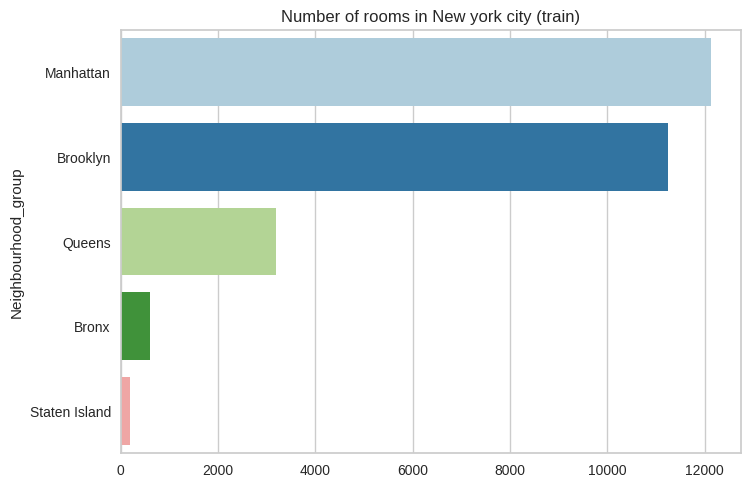

In [ ]:
import seaborn as sns

freq = train['neighbourhood_group'].value_counts().values
group = train['neighbourhood_group'].value_counts().index

ax = sns.barplot(x=freq, y=group, palette='Paired')
ax.set_title('Number of rooms in New york city (train)')
ax.set_ylabel('Neighbourhood_group')

맨하튼과 브루클린에 데이터가 모여있다.

Text(0, 0.5, 'Neighbourhood_group')

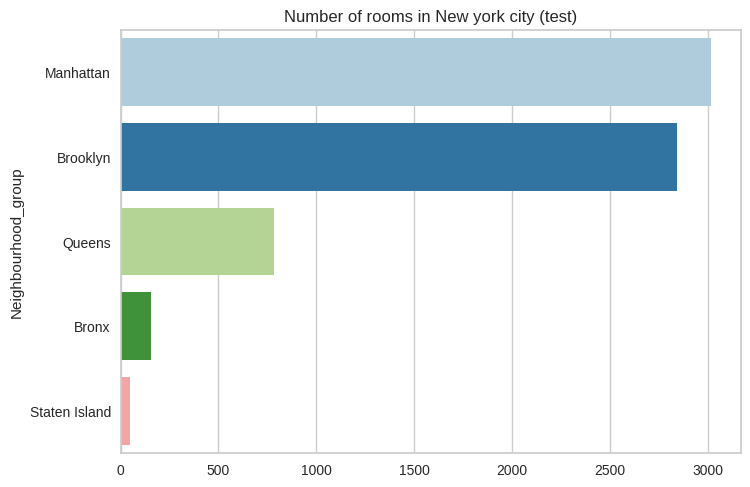

In [ ]:
import seaborn as sns

freq = test['neighbourhood_group'].value_counts().values
group = test['neighbourhood_group'].value_counts().index

ax = sns.barplot(x=freq, y=group, palette='Paired')
ax.set_title('Number of rooms in New york city (test)')
ax.set_ylabel('Neighbourhood_group')

test 데이터 또한 train 데이터와 비슷한 결과가 도출됨

결측치나 오타 등의 수정 사항이 없으므로 추가적인 전처리는 하지 않고 넘어간다.

In [ ]:
# neighbourhood와 neighbourhood_group이 잘 짝지어졌나 확인 > 확인 결과 다 맞게 들어감 (thanks to gpt~)
'''
print(airbnb.loc[airbnb['neighbourhood_group']=='Bronx']['neighbourhood'].unique())
print(airbnb.loc[airbnb['neighbourhood_group']=='Manhattan']['neighbourhood'].unique())
print(airbnb.loc[airbnb['neighbourhood_group']=='Brooklyn']['neighbourhood'].unique())
print(airbnb.loc[airbnb['neighbourhood_group']=='Staten Island']['neighbourhood'].unique())
print(airbnb.loc[airbnb['neighbourhood_group']=='Queens']['neighbourhood'].unique())
'''

"\nprint(airbnb.loc[airbnb['neighbourhood_group']=='Bronx']['neighbourhood'].unique())\nprint(airbnb.loc[airbnb['neighbourhood_group']=='Manhattan']['neighbourhood'].unique())\nprint(airbnb.loc[airbnb['neighbourhood_group']=='Brooklyn']['neighbourhood'].unique())\nprint(airbnb.loc[airbnb['neighbourhood_group']=='Staten Island']['neighbourhood'].unique())\nprint(airbnb.loc[airbnb['neighbourhood_group']=='Queens']['neighbourhood'].unique())\n"

### 2. neighbourhood

In [ ]:
# 분포 출력
train['neighbourhood'].value_counts()

,count
neighbourhood,
Williamsburg,2146
Bedford-Stuyvesant,2066
Harlem,1449
Bushwick,1387
Upper West Side,1104
...,...
Richmondtown,1
Prince's Bay,1
New Dorp,1


이상치 및 결측치인 값은 없는 것으로 보임

### 3. latitude

뉴욕주가 북위 40° 43′ (40.7167°), 서경 74° 00′ (-74.0°)인데 train 데이터 중에서 해당 범위를 벗어난 데이터가 있는지(뉴욕주가 아닌 다른 곳에 위치한 이상치) 확인

In [ ]:
train['latitude'].isnull().sum()

0

In [ ]:
# 뉴욕시 위도 범위 설정 (약 40.4774°에서 40.9176°)
min_latitude = 40.4774
max_latitude = 40.9176

# 범위를 벗어나는 데이터 확인
out_of_range_latitudes = train[(train['latitude'] < min_latitude) | (train['latitude'] > max_latitude)]

# 결과 출력
if not out_of_range_latitudes.empty:
    print(f"There are {len(out_of_range_latitudes)} rows where 'latitude' is out of range.")
    print(out_of_range_latitudes[['latitude', 'longitude']])
else:
    print("All 'latitude' values are within the expected range.")

All 'latitude' values are within the expected range.


벗어나는 이상치 없음 : 모든 데이터가 뉴욕시 내에 존재함

### 4. longitude

In [ ]:
train['longitude'].isnull().sum()

0

In [ ]:
# 경도의 범위 설정 (서경 74° 00′를 기준으로 설정)
min_longitude = -74.25
max_longitude = -73.7

# 범위를 벗어나는 데이터 확인
out_of_range_longitudes = train[(train['longitude'] < min_longitude) | (train['longitude'] > max_longitude)]

# 결과 출력
if not out_of_range_longitudes.empty:
    print(f"There are {len(out_of_range_longitudes)} rows where 'longitude' is out of range.")
    print(out_of_range_longitudes[['latitude', 'longitude']])
else:
    print("All 'longitude' values are within the expected range.")

All 'longitude' values are within the expected range.


벗어나는 이상치 없음 : 모든 데이터가 뉴욕시 내에 존재함

- 위도, 경도 이용해서 지도에 에어비앤비 숙소 위치 표시해보기

In [ ]:
import folium

# 지도 초기화 (중심을 데이터의 평균 위도와 경도로 설정)
center_lat = train['latitude'].mean()
center_lon = train['longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# 데이터포인트 추가
for _, row in train.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,  # 점 크기
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

# Jupyter Notebook에서 지도 표시
m

### 5. room_type

In [ ]:
train['room_type'].value_counts()

,count
room_type,
Entire home/apt,14254
Private room,12486
Shared room,639


In [ ]:
test['room_type'].value_counts()

,count
room_type,
Entire home/apt,3553
Private room,3134
Shared room,160


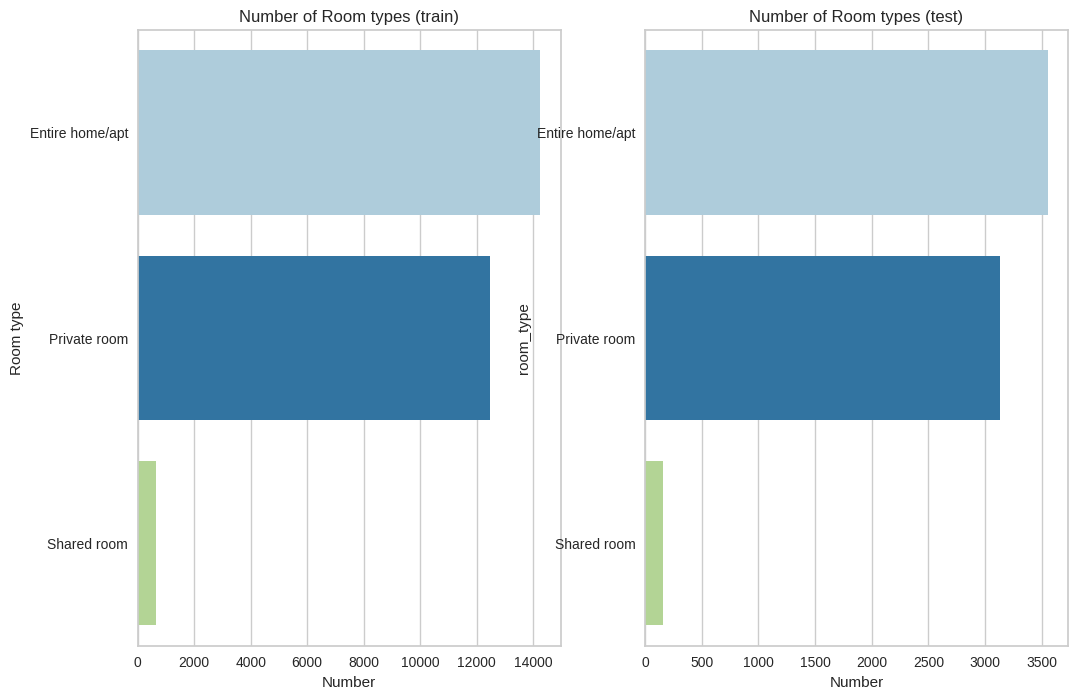

In [ ]:
freq1 = train['room_type'].value_counts().values
group1 = train['room_type'].value_counts().index

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
sns.barplot(x=freq1, y=group1, palette='Paired', ax=ax[0])
ax[0].set_title('Number of Room types (train)')
ax[0].set_xlabel('Number')
ax[0].set_ylabel('Room type')

freq2 = test['room_type'].value_counts().values
group2 = test['room_type'].value_counts().index

sns.barplot(x=freq2, y=group2, palette='Paired', ax=ax[1])
ax[1].set_title('Number of Room types (test)')
ax[1].set_xlabel('Number')
plt.show()

방 전체를 쓰도록 하는 Entire home/apt 타입이 가장 많고, 집 안에 독방을 주는 경우도 비슷하게 많았음. 하지만 룸셰어 형태의 타입은 확연히 적음

전처리 할 사항 보이지 않으므로 전처리 진행 x

### 6. price

In [ ]:
train['price'].describe()

,price
count,27379.000000
mean,151.569561
std,219.807784
min,0.000000
25%,69.000000
50%,105.000000
75%,175.000000
max,10000.000000


결측치는 없으나 최솟값이 0임, 결측치가 0으로 입력되었을 것

최댓값도 10000 (약 천오백만원, 말이 안 됨)

In [ ]:
print(np.sum(train['price']==0))

8


In [ ]:
# 가격이 0인 8개의 행 제거
train = train[train.price != 0]
train.price.describe()

,price
count,27371.000000
mean,151.613861
std,219.824628
min,10.000000
25%,69.000000
50%,105.000000
75%,175.000000
max,10000.000000


<Axes: xlabel='price', ylabel='Count'>

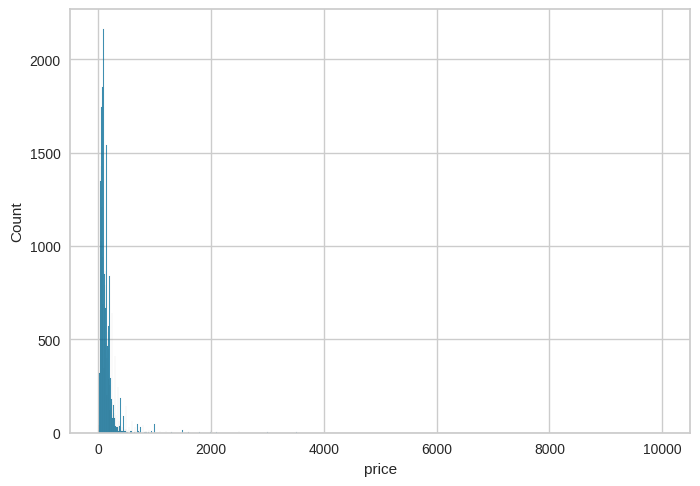

In [ ]:
sns.histplot(train['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a4cb2bc8c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7a4cb2bdd350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a4d02cbe1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a4cb2bde4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a4cb8616650>],
 'means': []}

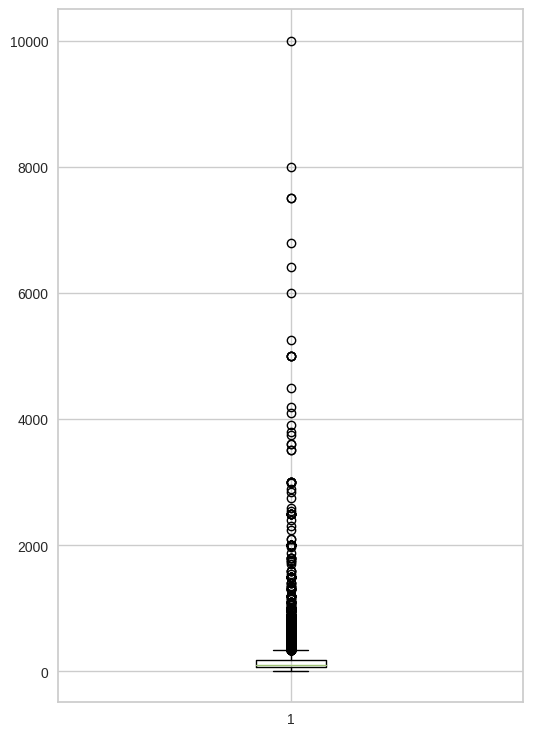

In [ ]:
plt.subplots(figsize=(6,9))
plt.boxplot(train['price'])

극도로 큰 값이 많아 데이터가 right-skewed 모양임 → 로그 변환 진행

<Axes: xlabel='price', ylabel='Count'>

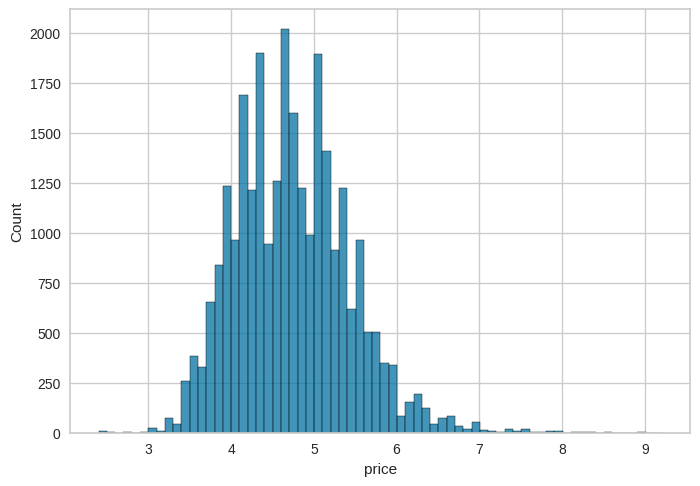

In [ ]:
# 로그 변환 결과 얼추 정규분포 모양을 따름
sns.histplot(np.log1p(train['price']), binwidth=0.1)

In [ ]:
# Q1, Q3 및 IQR 계산
Q1 = np.log1p(train['price']).quantile(0.25)  # 1사분위수
Q3 = np.log1p(train['price']).quantile(0.75)  # 3사분위수
IQR = Q3 - Q1  # IQR 계산

# 이상치 기준 설정
lower_bound = Q1 - 1.5 * IQR  # 하한
upper_bound = Q3 + 1.5 * IQR  # 상한

# 이상치를 제거한 데이터 생성
filtered_data = train[(np.log1p(train['price']) >= lower_bound) & (np.log1p(train['price']) <= upper_bound)]

# 결과 확인
print("제거 전 데이터 크기:", train.shape[0])
print("제거 후 데이터 크기:", filtered_data.shape[0])

제거 전 데이터 크기: 27371
제거 후 데이터 크기: 27033


<Axes: ylabel='price'>

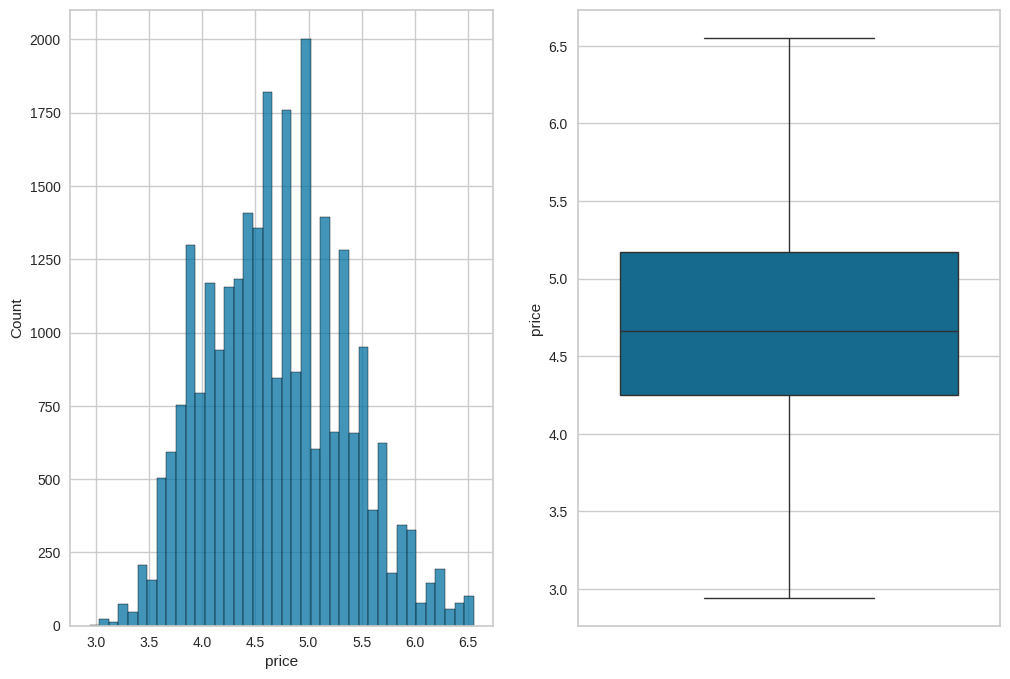

In [ ]:
# 원래 데이터 이상치 제거, 로그변환 진행
train = filtered_data
train['price'] = np.log1p(train.price)

# 최종 가격 데이터 분포 시각화
fig, axes = plt.subplots(1,2, figsize=(12,8))
sns.histplot(train.price, bins=40 ,ax=axes[0])
sns.boxplot(train.price, ax=axes[1])

### 7. minimum_nights

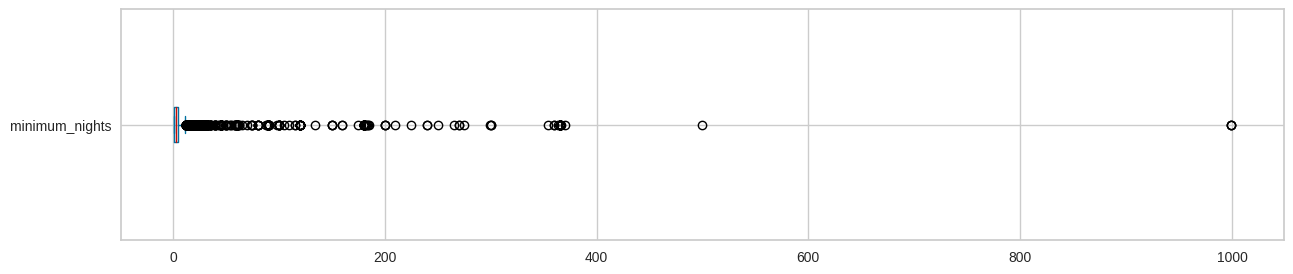

In [ ]:
# minimum_nights
train['minimum_nights'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

In [ ]:
# minimum_nights이 30일이 넘는 데이터의 수와 비율
print('Values over 30 nights: ')
print(len(train[train['minimum_nights'] > 30]))
print('{:.4f}%'.format((len(train[train['minimum_nights'] > 30]) / train.shape[0]) * 100))

Values over 30 nights: 
381
1.4094%


minimum_nights이 30일 이상인 에어비앤비 : 400개, 비율 : 1.4610%

- minimum_nights이 30일 이상인 데이터 삭제

In [ ]:
train = train[(train['minimum_nights'] <= 30)].copy()

<Axes: xlabel='minimum_nights', ylabel='Count'>

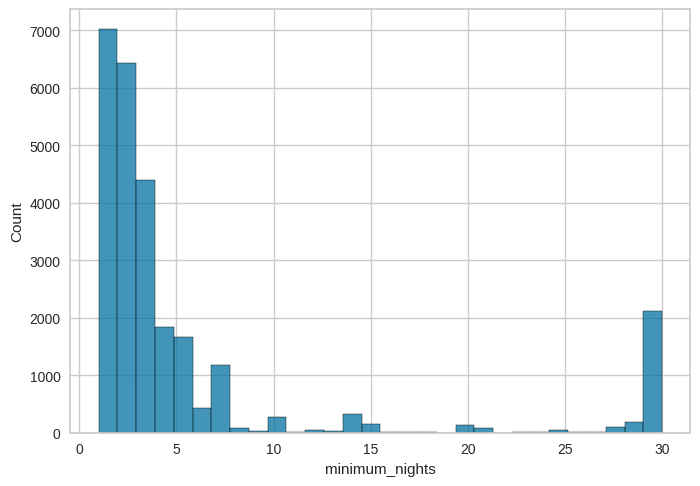

In [ ]:
sns.histplot(train['minimum_nights'], bins=30)

### 8. number_of_reviews

In [ ]:
train['number_of_reviews'].isnull().sum()

0

In [ ]:
train['number_of_reviews'].max()

607

In [ ]:
train['number_of_reviews'].min()

0

<Axes: xlabel='number_of_reviews', ylabel='Count'>

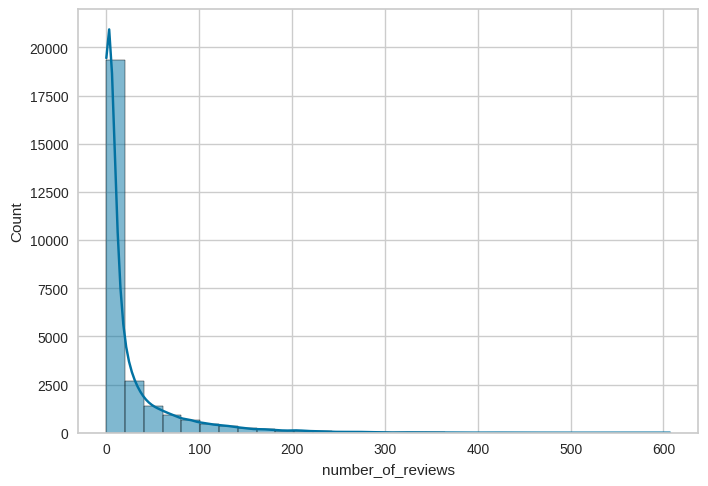

In [ ]:
sns.histplot(train['number_of_reviews'], bins=30, kde=True)

결측치 없음

0~607개 사이의 범위에서 리뷰 존재

확실히 리뷰가 적은 곳이 많고 리뷰 수가 많은 에어비앤비 수가 적어짐

### 9. calculated_host_listings_count

<Axes: >

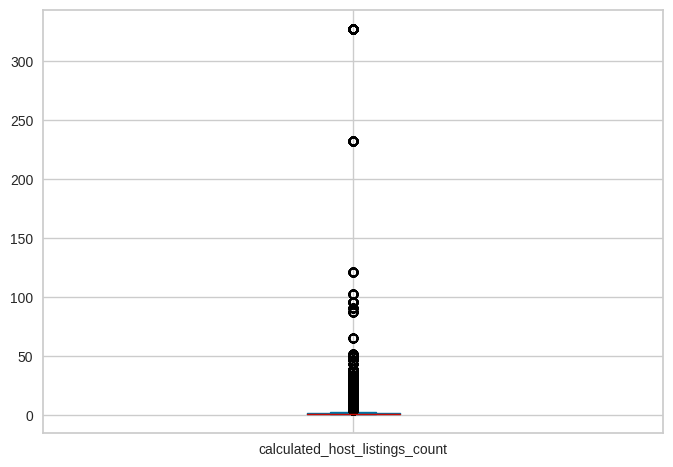

In [ ]:
train['calculated_host_listings_count'].plot(kind='box')

In [ ]:
# calculated_host_listings_count이 50이 넘는 데이터의 수와 비율
print(len(train[train['calculated_host_listings_count'] > 50]))
print('{:.4f}%'.format((len(train[train['calculated_host_listings_count'] > 50]) / train.shape[0]) * 100))

751
2.8178%


calculated_host_listings_count이 50개 이상인 에어비앤비 : 759개, 비율 : 2.7722%

In [ ]:
# calculated_host_listings_count이 5개 이하인 에어비앤비
print('{:.4f}%'.format((len(train[train['calculated_host_listings_count'] <= 5]) / train.shape[0]) * 100))

90.4060%


calculated_host_listings_count이 5개 이하인 데이터 : 90.2224% => 대부분을 차지함

In [ ]:
print('{:.4f}%'.format((len(train[train['calculated_host_listings_count'] == 1]) / train.shape[0]) * 100))
print('{:.4f}%'.format((len(train[train['calculated_host_listings_count'] == 2]) / train.shape[0]) * 100))
print('{:.4f}%'.format((len(train[train['calculated_host_listings_count'] == 3]) / train.shape[0]) * 100))

66.3740%
13.4774%
5.8345%


- calculated_host_listings_count이 50개 이상인 데이터 삭제

In [ ]:
train = train[(train['calculated_host_listings_count'] <= 50)].copy()

<Axes: xlabel='calculated_host_listings_count', ylabel='Count'>

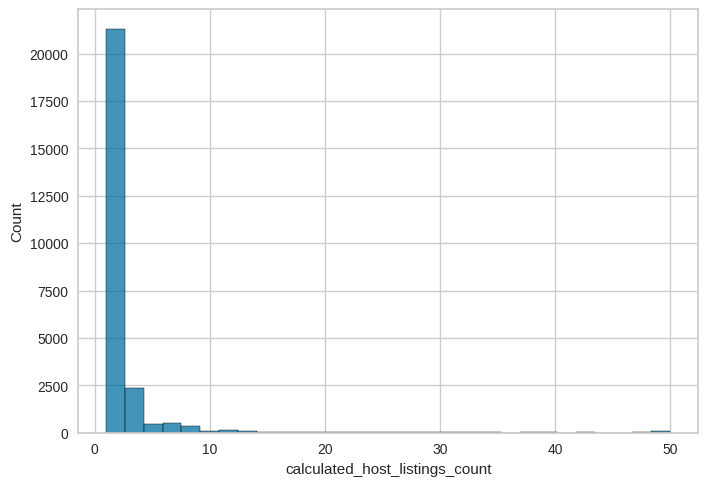

In [ ]:
sns.histplot(train['calculated_host_listings_count'], bins=30)

### 10. availability_365

<Axes: xlabel='availability_365', ylabel='Count'>

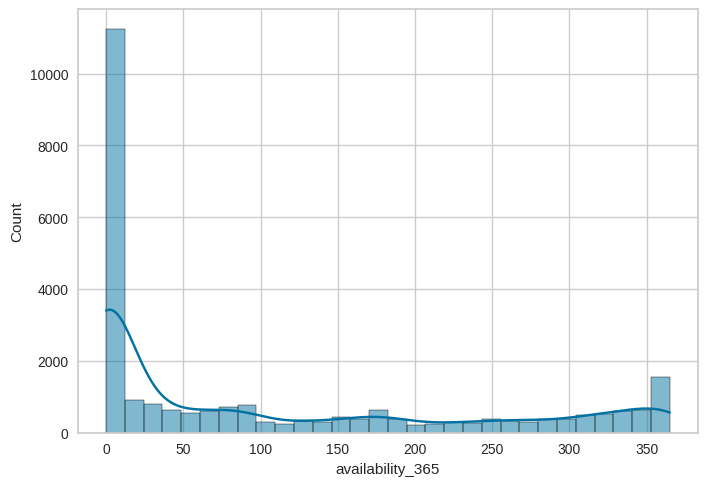

In [ ]:
sns.histplot(train['availability_365'], bins=30, kde=True)

In [ ]:
train[train['availability_365'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1,Clinton Hill Apartment Single Bedroom ! Pratt ~~,30610258,Santiago,Brooklyn,Clinton Hill,40.69591,-73.96284,Private room,4.077537,2,1,9/23/2018,0.10,1,0
3,4,15 min train ride to Times Sq and US OPEN,101602599,M,Queens,Woodside,40.74340,-73.90588,Entire home/apt,3.931826,1,95,6/24/2019,5.63,2,0
20,21,1 bedroom/1 Bath/Balcony/Wash-Dryer,42320409,Timothy,Brooklyn,Williamsburg,40.70760,-73.94072,Entire home/apt,4.477337,1,3,10/24/2015,0.07,1,0
22,23,Charming room Chinatown Manhattan,45951143,Alexandra,Manhattan,Chinatown,40.71319,-73.99265,Private room,4.615121,1,1,10/13/2015,0.02,1,0
25,26,Two Bedroom on the Upper East Side,80593607,Theodore,Manhattan,Upper East Side,40.77788,-73.95615,Entire home/apt,4.663439,1,3,8/23/2016,0.08,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27367,27368,Great little spot,164048400,Jarryd,Brooklyn,Bushwick,40.70167,-73.93075,Private room,3.713572,1,1,12/30/2017,0.05,1,0
27370,27371,Modern 1 Bedroom In Vibrant BK Neighborhood,10218689,Bere,Brooklyn,Crown Heights,40.67088,-73.95128,Entire home/apt,4.510860,4,26,6/19/2019,2.85,1,0
27372,27373,Bedroom on Quiet Block on the Lower East Side,29111684,Samuel,Manhattan,Lower East Side,40.72167,-73.99075,Private room,4.454347,30,2,3/20/2017,0.06,1,0
27374,27375,Dream home: Beautiful 2B2B Condo in Chelsea,106627653,Jacob,Manhattan,Chelsea,40.74735,-73.99974,Entire home/apt,6.373320,3,7,8/4/2018,0.23,1,0


In [ ]:
len(train[train['availability_365'] == 0])

9587

이용 가능한 일수가 0인 데이터 즉, 이용 불가능한 에어비앤비에 대한 데이터가 9746개로 꽤나 많음

In [ ]:
len(train[(train['availability_365'] == 0) & (train['number_of_reviews'] != 0)])

7013

In [ ]:
len(train[(train['availability_365'] == 0) & (train['number_of_reviews'] == 0)])

2574

number_of_reviews는 있지만 availability_365가 0인 데이터가 7089개 있음 → 이상치 같으니 다른 값으로 대체해보기

- room_type별 availability_365의 평균값을 구해 대체해보기

In [ ]:
# 1. availability_365가 0인 데이터와 아닌 데이터를 분리
df_zero_avail = train[train['availability_365'] == 0]  # 제외할 데이터
df_non_zero_avail = train[train['availability_365'] > 0]  # 분석할 데이터

# 2. room_type별 availability_365 평균 계산
room_type_avg = df_non_zero_avail.groupby('room_type')['availability_365'].mean()

# 3. availability_365가 0인 데이터의 값을 room_type별 평균으로 대체
df_zero_avail['availability_365'] = df_zero_avail['room_type'].map(room_type_avg)

# 4. 수정된 데이터 병합
train_update = pd.concat([df_non_zero_avail, df_zero_avail], ignore_index=True)

# 결과 출력
print("Room type별 평균 availability_365:")
print(room_type_avg)

Room type별 평균 availability_365:
room_type
Entire home/apt    159.755077
Private room       175.779646
Shared room        216.042918
Name: availability_365, dtype: float64


In [ ]:
# 상관관계 계산 함수
def calculate_price_correlation(data, target_column='price'):
    correlations = {}
    for column in data.columns:
        if column != target_column and pd.api.types.is_numeric_dtype(data[column]):
            correlations[column] = data[column].corr(data[target_column])
    return correlations

# availability_365 열과 price 열 간의 상관관계 계산
availability_train_corr = train['availability_365'].corr(train['price'])
availability_train_update_corr = train_update['availability_365'].corr(train_update['price'])

# 결과 비교 출력
print("Train 데이터:", availability_train_corr)
print("Train_update 데이터:", availability_train_update_corr)

Train 데이터: 0.047101739320089875
Train_update 데이터: -0.0036643027662507394


원래 train 데이터에서의 상관관계가 높음

→ room_type별 평균 availability_365 값으로 대체하는 것은 좋은 방법 같지 않음

- availability_365의 값을 number_of_reviews 값으로 대체해보기

In [ ]:
# 원본 데이터프레임 복사
train_update2 = train.copy()

# 조건에 맞는 행의 availability_365 값을 number_of_reviews 값으로 대체
train_update2['availability_365'] = train_update2.loc[(train_update2['availability_365'] == 0) & (train_update2['number_of_reviews'] != 0), 'number_of_reviews']

In [ ]:
# 상관관계 계산 함수
def calculate_price_correlation(data, target_column='price'):
    correlations = {}
    for column in data.columns:
        if column != target_column and pd.api.types.is_numeric_dtype(data[column]):
            correlations[column] = data[column].corr(data[target_column])
    return correlations

# availability_365 열과 price 열 간의 상관관계 계산
availability_train_corr = train['availability_365'].corr(train['price'])
availability_train_update2_corr = train_update2['availability_365'].corr(train_update2['price'])

# 결과 비교 출력
print("Train 데이터:", availability_train_corr)
print("Train_update 데이터:", availability_train_update2_corr)

Train 데이터: 0.047101739320089875
Train_update 데이터: -0.018340482550297216


원래 train 데이터에서의 상관관계가 높음

→ availability_365의 값을 number_of_reviews 값으로 대체하는 것도 좋아보이지 않음

0값 전체 제거, 평균값으로 대체해보아도 모두 상관관계 값이 낮아지므로 따로 전처리 진행 안하는 것이 제일 좋은 것 같음

## (2) 집값 데이터 전처리 진행 & 병합

## 15개의 집값 데이터 파일을 병합하여 전체 집값 데이터 파일 만들기

### 데이터 로드 및 병합

In [ ]:
import pandas as pd
import numpy as np

# 데이터 로드 및 병합 함수 정의
def load_and_merge_data(years, borough):
    dfs = [
        pd.read_csv(f'/content/drive/MyDrive/YB_project/houseprice/{year}_{borough}.csv')
        for year in years
    ]
    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df

# 필요한 열 선택 및 컬럼명 변경 함수
def select_and_rename_columns(df):
    selected = df[['NEIGHBORHOOD\n', 'SALE PRICE\n']]
    renamed = selected.rename(columns={
        'NEIGHBORHOOD\n': 'neighborhood',
        'SALE PRICE\n': 'house_price'
    })
    return renamed

# 처리 대상 데이터
boroughs = ['bronx', 'brooklyn', 'manhattan', 'queens', 'statenisland']
years = [2018, 2019, 2020]

# 각 지역 데이터 로드, 병합 및 정리
all_data = {}
house_price = pd.DataFrame()  # 전체 데이터를 위한 DataFrame

for borough in boroughs:
    print(f"Processing data for: {borough}")
    merged_data = load_and_merge_data(years, borough)
    cleaned_data = select_and_rename_columns(merged_data)

    if not cleaned_data.empty:
        cleaned_data['neighborhood_group'] = borough
        # 가격에서 달러 기호 및 쉼표 제거
        cleaned_data['house_price'] = cleaned_data['house_price'].replace({'\$': '', ',': ''}, regex=True)
        # house_price를 숫자형으로 변환 (변환 불가능한 값은 NaN 처리)
        cleaned_data['house_price'] = pd.to_numeric(cleaned_data['house_price'], errors='coerce')

    all_data[borough] = cleaned_data
    house_price = pd.concat([house_price, cleaned_data], ignore_index=True)  # 전체 데이터 병합

# 전체 데이터를 하나의 CSV 파일로 저장
house_price.to_csv('/content/drive/MyDrive/YB_project/houseprice/house_price.csv', index=False)
print("All boroughs data saved to house_price.csv")

Processing data for: bronx
Processing data for: brooklyn
Processing data for: manhattan
Processing data for: queens
Processing data for: statenisland
All boroughs data saved to house_price.csv


2018,2019,2020년도별로 5개의 지역구 데이터가 csv 파일 형태로 따로 존재하였기 때문에 총 15개의 파일을 병합하여 하나의 csv 파일로 저장

### 가격 전처리

- na값, 0값 제거
- 로그 변환 후 이상치 제거

In [ ]:
# 새로 만든 파일 읽어오기
df = pd.read_csv("/content/drive/MyDrive/YB_project/houseprice/house_price.csv")

In [ ]:
df.head()

,neighborhood,house_price,neighborhood_group
0,BATHGATE,241500.0,bronx
1,BATHGATE,180000.0,bronx
2,BATHGATE,455000.0,bronx
3,BATHGATE,255000.0,bronx
4,BATHGATE,340000.0,bronx


In [ ]:
df.shape

(277803, 3)

In [ ]:
# NaN 값 및 0 값 제거
df = df.dropna(subset=['house_price'])
df = df[df['house_price'] != 0]

In [ ]:
df.shape

(115836, 3)

In [ ]:
# 'neighborhood_group'으로 데이터 그룹화
grouped_data = df.groupby('neighborhood_group')

# 결과 저장을 위한 딕셔너리 생성
filtered_groups = {}

# 각 그룹 처리
for group_name, group_df in grouped_data:
    log_prices = np.log1p(group_df['house_price'])  # 로그 변환

    # Q1, Q3 및 IQR 계산
    Q1 = log_prices.quantile(0.25)
    Q3 = log_prices.quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 제거 기준 설정
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치를 제거한 데이터 필터링
    filtered_group = group_df[(log_prices >= lower_bound) & (log_prices <= upper_bound)]
    filtered_groups[group_name] = filtered_group

# 필터링된 데이터를 하나의 DataFrame으로 결합
filtered_df = pd.concat(filtered_groups.values())

filtered_df

,neighborhood,house_price,neighborhood_group
0,BATHGATE,241500.0,bronx
1,BATHGATE,180000.0,bronx
2,BATHGATE,455000.0,bronx
3,BATHGATE,255000.0,bronx
4,BATHGATE,340000.0,bronx
...,...,...,...
263428,WOODROW,610000.0,statenisland
263429,WOODROW,625000.0,statenisland
263431,WOODROW,637500.0,statenisland
263432,WOODROW,599701.0,statenisland


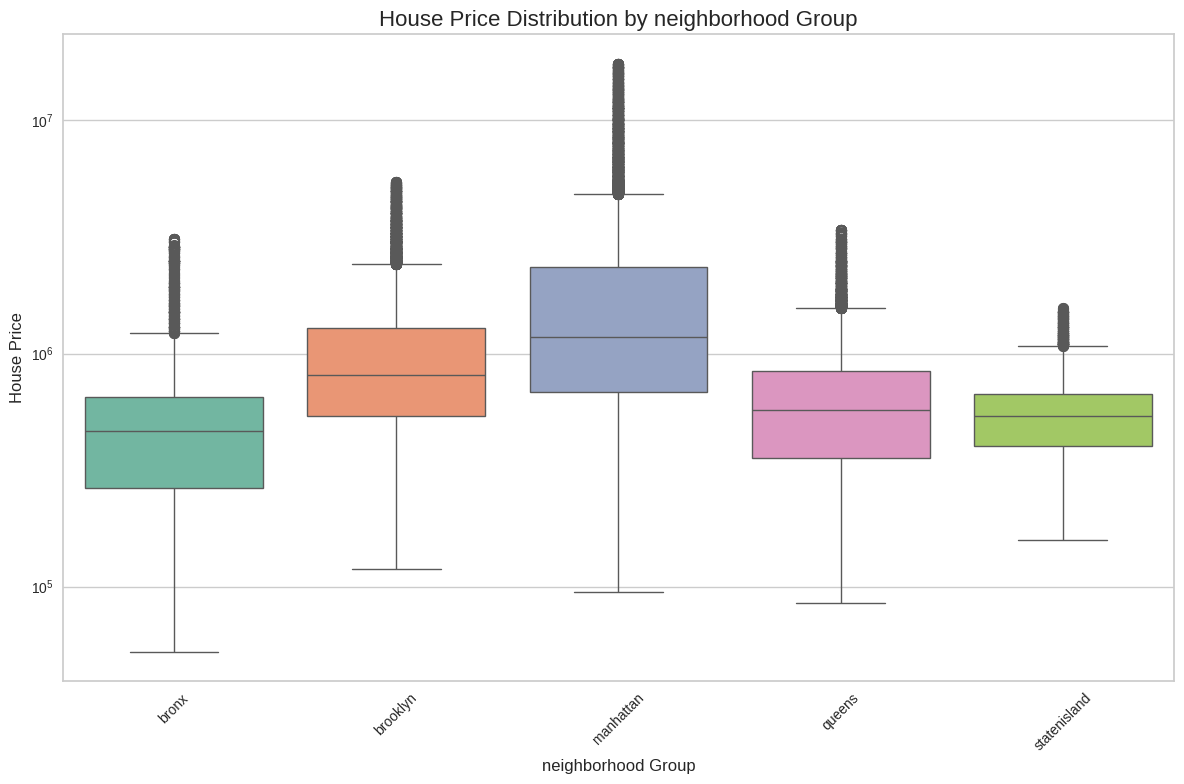

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 설정
plt.figure(figsize=(12, 8))

# 상자 그림(Boxplot) 그리기
sns.boxplot(data=filtered_df, x='neighborhood_group', y='house_price', palette='Set2')

# 그래프 꾸미기
plt.title('House Price Distribution by neighborhood Group', fontsize=16)
plt.xlabel('neighborhood Group', fontsize=12)
plt.ylabel('House Price', fontsize=12)
plt.xticks(rotation=45)
plt.yscale('log')  # 로그 스케일로 설정 (필요에 따라 제거 가능)
plt.tight_layout()

# 그래프 출력
plt.show()

### neighborhood_group별 평균 가격 구하기

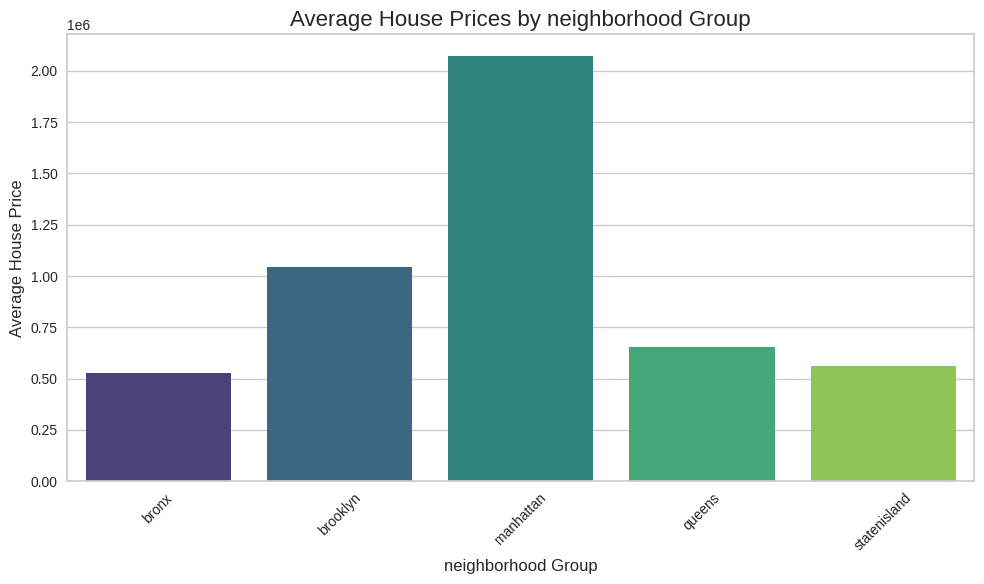

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 지역구별 평균 집 가격 계산
average_prices = filtered_df.groupby('neighborhood_group')['house_price'].mean().reset_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(data=average_prices, x='neighborhood_group', y='house_price', palette='viridis')

# 그래프 꾸미기
plt.title('Average House Prices by neighborhood Group', fontsize=16)
plt.xlabel('neighborhood Group', fontsize=12)
plt.ylabel('Average House Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()

manhattan이 제일 높고 brooklyn이 두번째 나머지 3개가 적음 → 전처리가 잘 이루어졌다고 판단됨

### neighborhood별 평균 가격 구하기

In [ ]:
# Step 1: neighborhood별 평균 주택 가격 계산
neighborhood_mean_prices = (
    filtered_df.groupby('neighborhood', as_index=False)['house_price'].mean()
)

# Step 2: neighborhood_group 정보 추가
# filtered_df에서 'neighborhood'와 'neighborhood_group'의 고유 조합 추출
neighborhood_group_mapping = filtered_df[['neighborhood', 'neighborhood_group']].drop_duplicates()

# Merge neighborhood_mean_prices와 neighborhood_group_mapping
result_df = pd.merge(neighborhood_mean_prices, neighborhood_group_mapping, on='neighborhood')

# Step 3: 열 이름 변경 및 순서 조정
result_df.rename(columns={'house_price': 'house_price_mean'}, inplace=True)
result_df = result_df[['neighborhood', 'neighborhood_group', 'house_price_mean']]

# 결과 확인
result_df

,neighborhood,neighborhood_group,house_price_mean
0,AIRPORT LA GUARDIA,queens,7.734375e+05
1,ALPHABET CITY,manhattan,1.790824e+06
2,ANNADALE,statenisland,7.538919e+05
3,ARDEN HEIGHTS,statenisland,4.666251e+05
4,ARROCHAR,statenisland,6.190723e+05
...,...,...,...
247,WOODHAVEN,queens,6.762438e+05
248,WOODLAWN,bronx,4.212632e+05
249,WOODROW,statenisland,6.367322e+05
250,WOODSIDE,queens,6.567326e+05


In [ ]:
len(filtered_df['neighborhood'].unique())

251

In [ ]:
# 동일한 neighborhood에 대해 서로 다른 neighborhood_group을 가진 행 찾기
duplicated_neighborhoods = result_df.groupby('neighborhood')['neighborhood_group'].nunique()
inconsistent_neighborhoods = duplicated_neighborhoods[duplicated_neighborhoods > 1].index

# 추출된 neighborhood를 기준으로 데이터 필터링
inconsistent_rows = result_df[result_df['neighborhood'].isin(inconsistent_neighborhoods)]

# 결과 확인
inconsistent_rows

,neighborhood,neighborhood_group,house_price_mean
217,SUNNYSIDE,queens,706456.617571
218,SUNNYSIDE,statenisland,706456.617571


원래 데이터셋에서 neighborhood가 251개로 관측되는데 총 252개의 평균이 구해짐

neighborhood는 동일하지만 다른 neighborhood_group을 가진 데이터가 있는지 확인해보니까 SUNNYSIDE가 queens랑 statenisland에 모두 존재 → 모든 neighborhood별로 평균값이 구해졌음을 확인할 수 있음, 그리고 에어비앤비 데이터와 연결할때 neighborhood와 neighborhood_group 모두 동일한 데이터끼리 연결지어야함!!

### 에어비앤비 숙소 데이터에 neighborhoood별 평균값 추가하기

In [ ]:
# 열 이름 통일 (neighborhood -> neighbourhood)
result_df.rename(columns={'neighborhood': 'neighbourhood'}, inplace=True)
result_df.rename(columns={'neighborhood_group': 'neighbourhood_group'}, inplace=True)

# 모든 값을 소문자로 변환
train['neighbourhood'] = train['neighbourhood'].str.lower()
train['neighbourhood_group'] = train['neighbourhood_group'].str.lower()

result_df['neighbourhood'] = result_df['neighbourhood'].str.lower()
result_df['neighbourhood_group'] = result_df['neighbourhood_group'].str.lower()

# train 데이터와 result_df를 병합
result = pd.merge(
    train,
    result_df,
    on=['neighbourhood', 'neighbourhood_group'],  # 동일한 neighborhood와 neighborhood_group 기준으로 병합
    how='left'
)

# 결과 출력
print(result)

          id                                               name    host_id  \
0          1   Clinton Hill Apartment Single Bedroom ! Pratt ~~   30610258   
1          2                                      Andy Phillips    6180052   
2          3   Stylish, Comfortable, and Affordable in Brooklyn    5957027   
3          4         15 min train ride to Times Sq and  US OPEN  101602599   
4          5  Sunny 2 bdrm Park Slope Apt w/ Yard 3min to Su...  106168581   
...      ...                                                ...        ...   
25896  27375        Dream home: Beautiful 2B2B Condo in Chelsea  106627653   
25897  27376       Beautiful apartment ~25min from Times Square    6358504   
25898  27377                             Restful Superior Court   51826974   
25899  27378  Private room with a view- cosy apt in East Vil...    5559293   
25900  27379       People of the Arts Welcome! \r\n420 friendly  202986805   

      host_name neighbourhood_group  neighbourhood  latitude  l

집값 평균을 추가했는데 결측치가 발생함 → 에어비앤비(trian 데이터셋) neighborhood와 집값(result_df) neighborhood가 모두 중복되지 않는 것 같음

## 데이터 전처리 재진행

에어비앤비 데이터와 집값 데이터 병합할 때 칼럼명이 동일하지 않거나 에어비앤비 데이터(train, test)에 존재하는 neighborhod와 집값 데이터(filtered_df)에 존재하는 neighborhood가 동일하지 않아서 병합 과정에서 결측치가 발생함

In [ ]:
# 열 이름 통일 (neighborhood -> neighbourhood)
filtered_df.rename(columns={'neighborhood': 'neighbourhood'}, inplace=True)
filtered_df.rename(columns={'neighborhood_group': 'neighbourhood_group'}, inplace=True)

### train 데이터

In [ ]:
# 모든 값을 소문자로 변환
train['neighbourhood'] = train['neighbourhood'].str.lower()
train['neighbourhood_group'] = train['neighbourhood_group'].str.lower()

# 띄어쓰기와 '-',''' 제거하고 붙여쓰기
train['neighbourhood'] = train['neighbourhood'].str.replace(' ', '').str.replace('-', '').str.replace("'", '')
train['neighbourhood_group'] = train['neighbourhood_group'].str.replace(' ', '').str.replace('-', '').str.replace("'", '')

### test 데이터

In [ ]:
# 모든 값을 소문자로 변환
test['neighbourhood'] = test['neighbourhood'].str.lower()
test['neighbourhood_group'] = test['neighbourhood_group'].str.lower()

# 띄어쓰기와 '-',''' 제거하고 붙여쓰기
test['neighbourhood'] = test['neighbourhood'].str.replace(' ', '').str.replace('-', '').str.replace("'", '')
test['neighbourhood_group'] = test['neighbourhood_group'].str.replace(' ', '').str.replace('-', '').str.replace("'", '')

### filtered_df 데이터

In [ ]:
# 모든 값을 소문자로 변환
filtered_df['neighbourhood'] = filtered_df['neighbourhood'].str.lower()
filtered_df['neighbourhood_group'] = filtered_df['neighbourhood_group'].str.lower()

# 띄어쓰기와 '-',''' 제거하고 붙여쓰기
filtered_df['neighbourhood'] = filtered_df['neighbourhood'].str.replace(' ', '').str.replace('-', '').str.replace("'", '')
filtered_df['neighbourhood_group'] = filtered_df['neighbourhood_group'].str.replace(' ', '').str.replace('-', '').str.replace("'", '')

# 괄호와 괄호 안의 내용(숫자) 제거
filtered_df['neighbourhood'] = filtered_df['neighbourhood'].str.replace(r'\(\d+\)', '', regex=True)

# '/' 기준으로 나누기
## '/' 기준으로 분리하고 stack()을 사용하여 값을 세로로 나열
filtered_df_split = filtered_df['neighbourhood'].str.split(r'/', expand=True).stack()

## 인덱스 초기화 후 열 이름 설정
filtered_df_split = filtered_df_split.reset_index(level=1, drop=True).rename('neighbourhood')

## 원본 데이터프레임과 결합
filtered_df = filtered_df.drop(columns=['neighbourhood']).join(filtered_df_split).reset_index(drop=True)

In [ ]:
# train, test, filtered_df의 'neighbourhood' 고유값 집합 생성
train_neighbourhood_set = set(train['neighbourhood'].unique())
test_neighbourhood_set = set(test['neighbourhood'].unique())
filtered_df_neighbourhood_set = set(filtered_df['neighbourhood'].unique())

# 교집합 구하기
common_neighbourhoods = train_neighbourhood_set & filtered_df_neighbourhood_set
common_neighbourhoods_2 = test_neighbourhood_set & filtered_df_neighbourhood_set

# 고유값 갯수 출력
print(f"Train 'neighbourhood' unique count: {len(train_neighbourhood_set)}")
print(f"Test 'neighbourhood' unique count: {len(test_neighbourhood_set)}")
print(f"Filtered_df 'neighbourhood' unique count: {len(filtered_df_neighbourhood_set)}")
print(f"Common 'neighbourhood' count: {len(common_neighbourhoods)}")
print(f"Common 'neighbourhood2' count: {len(common_neighbourhoods_2)}")

Train 'neighbourhood' unique count: 215
Test 'neighbourhood' unique count: 188
Filtered_df 'neighbourhood' unique count: 258
Common 'neighbourhood' count: 161
Common 'neighbourhood2' count: 140


### 세분화 된 항목 일반화

#### train 데이터

In [ ]:
# 차이점 확인 코드
only_in_train = train_neighbourhood_set - filtered_df_neighbourhood_set
only_in_filtered = filtered_df_neighbourhood_set - train_neighbourhood_set

print("Train에만 있는 항목:", sorted(only_in_train))
print("Filtered_df에만 있는 항목:", sorted(only_in_filtered))

Train에만 있는 항목: ['allerton', 'batteryparkcity', 'bayswater', 'bayterrace', 'claremontvillage', 'clasonpoint', 'clifton', 'columbiast', 'concoursevillage', 'ditmarssteinway', 'downtownbrooklyn', 'dumbo', 'eastchester', 'eastflatbush', 'eastharlem', 'eastmorrisania', 'edenwald', 'edgemere', 'financialdistrict', 'flatbush', 'flatirondistrict', 'flushing', 'forthamilton', 'graniteville', 'greenwichvillage', 'harlem', 'hellskitchen', 'howlandhook', 'kewgardenshills', 'lighthousehill', 'marblehill', 'midtown', 'noho', 'nolita', 'northriverdale', 'olinville', 'prospectleffertsgardens', 'randallmanor', 'rockawaybeach', 'shoreacres', 'southslope', 'spuytenduyvil', 'st.george', 'stuyvesanttown', 'theaterdistrict', 'tremont', 'twobridges', 'universityheights', 'vinegarhill', 'washingtonheights', 'westbrighton', 'westchestersquare', 'westvillage', 'williamsburg']
Filtered_df에만 있는 항목: ['airportlaguardia', 'alphabetcity', 'annadale', 'arrocharshoreacres', 'bathgate', 'bedfordpark', 'beechhurst', 'blo

In [ ]:
# only_in_train의 항목과 only_in_filtered의 일치하는 항목을 저장하는 dictionary 만들기
matching_dict = {}

# only_in_train의 각 항목을 반복하고 only_in_filtered에서 가능한 일치 항목 찾기
for train_item in only_in_train:
    matching_items = [item for item in only_in_filtered if train_item.lower() in item.lower()]
    if matching_items:
        matching_dict[train_item] = matching_items

# 필터링 된 결과 출력
for train_item, filtered_items in matching_dict.items():
    print(f"train: {train_item}, filtered_df: {', '.join(filtered_items)}")

# 역매핑 딕셔너리 생성
reverse_mapping = {sub_area: area for area, sub_areas in matching_dict.items() for sub_area in sub_areas}

# neighbourhood 값 완전히 교체 (fillna 제거 → replace 사용)
filtered_df['neighbourhood'] = filtered_df['neighbourhood'].replace(reverse_mapping)

# train과 filtered_df의 'neighbourhood' 고유값 집합 생성
train_neighbourhood_set = set(train['neighbourhood'].unique())
filtered_df_neighbourhood_set = set(filtered_df['neighbourhood'].unique())

# 교집합 구하기
common_neighbourhoods = train_neighbourhood_set & filtered_df_neighbourhood_set

# 고유값 갯수 출력
print(f"Train 'neighbourhood' unique count: {len(train_neighbourhood_set)}")
print(f"Filtered_df 'neighbourhood' unique count: {len(filtered_df_neighbourhood_set)}")
print(f"Common 'neighbourhood' count: {len(common_neighbourhoods)}")

train: tremont, filtered_df: easttremont
train: washingtonheights, filtered_df: washingtonheightslower, washingtonheightsupper
train: st.george, filtered_df: newbrightonst.george
train: harlem, filtered_df: harlemwest, harlemupper, harlemeast, harlemcentral
train: flushing, filtered_df: flushingmeadowpark, flushingsouth, flushingnorth
train: williamsburg, filtered_df: williamsburgnorth, williamsburgeast, williamsburgcentral, williamsburgsouth
train: flatbush, filtered_df: flatbushleffertsgarden, flatbusheast, flatbushnorth, flatbushcentral
train: greenwichvillage, filtered_df: greenwichvillagewest, greenwichvillagecentral
train: shoreacres, filtered_df: arrocharshoreacres
train: midtown, filtered_df: midtownwest, midtowneast, midtowncbd
train: bayterrace, filtered_df: greatkillsbayterrace
train: clifton, filtered_df: stapletonclifton
Train 'neighbourhood' unique count: 215
Filtered_df 'neighbourhood' unique count: 243
Common 'neighbourhood' count: 173


#### test 데이터

In [ ]:
# 차이점 확인 코드
only_in_test = test_neighbourhood_set - filtered_df_neighbourhood_set
only_in_filtered = filtered_df_neighbourhood_set - test_neighbourhood_set

print("Test에만 있는 항목:", sorted(only_in_test))
print("Filtered_df에만 있는 항목:", sorted(only_in_filtered))

Test에만 있는 항목: ['allerton', 'batteryparkcity', 'claremontvillage', 'clasonpoint', 'columbiast', 'concoursevillage', 'ditmarssteinway', 'downtownbrooklyn', 'dumbo', 'eastchester', 'eastflatbush', 'eastharlem', 'eastmorrisania', 'edenwald', 'edgemere', 'financialdistrict', 'flatirondistrict', 'forthamilton', 'hellskitchen', 'kewgardenshills', 'lighthousehill', 'marblehill', 'noho', 'nolita', 'northriverdale', 'olinville', 'prospectleffertsgardens', 'rockawaybeach', 'southslope', 'stuyvesanttown', 'theaterdistrict', 'twobridges', 'universityheights', 'vinegarhill', 'westbrighton', 'westfarms', 'westvillage']
Filtered_df에만 있는 항목: ['airportlaguardia', 'alphabetcity', 'annadale', 'ardenheights', 'bathgate', 'bedfordpark', 'beechhurst', 'bloomfield', 'breezypoint', 'broadchannel', 'bronxpark', 'bushterminal', 'castlehill', 'clinton', 'clovelakes', 'cobblehillwest', 'concordfoxhills', 'coopcity', 'countryclub', 'crotonapark', 'donganhillscolony', 'donganhillsoldtown', 'downtownfultonferry', 'do

In [ ]:
# Create a dictionary to store items from only_in_train and their matching items from only_in_filtered
matching_dict = {}

# Loop through each item in only_in_train and find possible matches in only_in_filtered
for test_item in only_in_test:
    matching_items = [item for item in only_in_filtered if test_item.lower() in item.lower()]
    if matching_items:
        matching_dict[test_item] = matching_items

# Output the filtered
for test_item, filtered_items in matching_dict.items():
    print(f"test: {test_item}, filtered_df: {', '.join(filtered_items)}")

matching_dict

{}

### neighborhood별 평균 가격 다시 구하고 에어비앤비 데이터에 추가하기

- filtered_df : 이상치 제거된 집값 **가격** 데이터

- result_df : neighborhood별로 집값 **평균 가격** 데이터

In [ ]:
# Step 1: neighborhood별 평균 주택 가격 계산
neighborhood_mean_prices = (
    filtered_df.groupby('neighbourhood', as_index=False)['house_price'].mean()
)

# Step 2: neighborhood_group 정보 추가
# filtered_df에서 'neighborhood'와 'neighborhood_group'의 고유 조합 추출
neighborhood_group_mapping = filtered_df[['neighbourhood', 'neighbourhood_group']].drop_duplicates()

# Merge neighborhood_mean_prices와 neighborhood_group_mapping
result_df = pd.merge(neighborhood_mean_prices, neighborhood_group_mapping, on='neighbourhood')

# Step 3: 열 이름 변경 및 순서 조정
result_df.rename(columns={'house_price': 'house_price_mean'}, inplace=True)
result_df = result_df[['neighbourhood', 'neighbourhood_group', 'house_price_mean']]

result_df

,neighbourhood,neighbourhood_group,house_price_mean
0,airportlaguardia,queens,7.734375e+05
1,alphabetcity,manhattan,1.790824e+06
2,annadale,statenisland,7.538919e+05
3,ardenheights,statenisland,4.666251e+05
4,arrochar,statenisland,6.190723e+05
...,...,...,...
239,woodhaven,queens,6.762438e+05
240,woodlawn,bronx,4.212632e+05
241,woodrow,statenisland,6.367322e+05
242,woodside,queens,6.567326e+05


#### train 데이터 병합

In [ ]:
# train 데이터와 result_df를 병합
result_train = pd.merge(
    train,
    result_df,
    on=['neighbourhood', 'neighbourhood_group'],  # 동일한 neighborhood와 neighborhood_group 기준으로 병합
    how='left'
)

# train과 result_df의 'neighbourhood' 고유값 집합 생성
train_neighbourhood_set = set(train['neighbourhood'].unique())
result_df_neighbourhood_set = set(result_df['neighbourhood'].unique())

# 교집합 구하기
common_neighbourhoods = train_neighbourhood_set & result_df_neighbourhood_set

# 고유값 갯수 출력
print(f"Train 'neighbourhood' unique count: {len(train_neighbourhood_set)}")
print(f"Result_df 'neighbourhood' unique count: {len(result_df_neighbourhood_set)}")
print(f"Common 'neighbourhood' count: {len(common_neighbourhoods)}")

Train 'neighbourhood' unique count: 215
Result_df 'neighbourhood' unique count: 285
Common 'neighbourhood' count: 215


#### test 데이터 병합

In [ ]:
# test 데이터와 result_df를 병합
result_test = pd.merge(
    test,
    result_df,
    on=['neighbourhood', 'neighbourhood_group'],  # 동일한 neighborhood와 neighborhood_group 기준으로 병합
    how='left'
)

# test과 filtered_df의 'neighbourhood' 고유값 집합 생성
test_neighbourhood_set = set(test['neighbourhood'].unique())
filtered_df_neighbourhood_set = set(filtered_df['neighbourhood'].unique())

# 교집합 구하기
common_neighbourhoods_2 = test_neighbourhood_set & filtered_df_neighbourhood_set

# 고유값 갯수 출력
print(f"Test 'neighbourhood' unique count: {len(test_neighbourhood_set)}")
print(f"Filtered_df 'neighbourhood' unique count: {len(filtered_df_neighbourhood_set)}")
print(f"Common 'neighbourhood' count: {len(common_neighbourhoods_2)}")

Test 'neighbourhood' unique count: 188
Filtered_df 'neighbourhood' unique count: 243
Common 'neighbourhood' count: 151


### 데이터 전처리 추가 진행

train, test에만 있고 result_df에 없는 neighborhood가 존재해서 가격 병합 후 또!! 결측치 발생 (train에 약 13845개, test에 약 13845개)

→ train, test에만 있는 neighborhood를 추출하여 result_df에 평균 가격을 NaN 상태로 추가한 후에 인근 지역의 평균 가격으로 대체시키기

ex) allerton -> bronxdale의 경우

train, test에만 있는 allerton을 근처 지역인 bronxdale의 평균 가격으로 대체

#### train 데이터

In [ ]:
# 차이점 확인 코드
only_in_train = train_neighbourhood_set - result_df_neighbourhood_set
only_in_result = result_df_neighbourhood_set - train_neighbourhood_set

print("Train에만 있는 항목:", sorted(only_in_train))
print("Train에만 있는 항목 개수:", len(only_in_train))

print("Result_df에만 있는 항목:", sorted(only_in_result))
print("Result_df에만 있는 항목:", len(only_in_result))

Train에만 있는 항목: []
Train에만 있는 항목 개수: 0
Result_df에만 있는 항목: ['airportlaguardia', 'alphabetcity', 'annadale', 'bathgate', 'bedfordpark', 'beechhurst', 'bloomfield', 'broadchannel', 'bronxpark', 'bushterminal', 'clinton', 'clovelakes', 'cobblehillwest', 'concordfoxhills', 'countryclub', 'crotonapark', 'donganhillscolony', 'donganhillsoldtown', 'downtownfultonferry', 'downtownfultonmall', 'downtownmetrotech', 'fashion', 'financial', 'flatiron', 'floralpark', 'gerritsenbeach', 'glenoaks', 'grasmere', 'hammels', 'hillcrest', 'hollishills', 'jamaicabay', 'javitscenter', 'jeromepark', 'kingsbridgehts', 'livingston', 'madison', 'manhattanvalley', 'manorheights', 'marinepark', 'neponsit', 'newdorpheights', 'oaklandgardens', 'oakwoodbeach', 'oceanhill', 'oceanparkwaynorth', 'oceanparkwaysouth', 'oldmillbasin', 'parkslopesouth', 'pelhamparkwaynorth', 'pelhamparkwaysouth', 'pleasantplains', 'portivory', 'richmondtownlighthshill', 'rockawaypark', 'rossville', 'rossvillecharleston', 'rossvilleportmobil

In [ ]:
# neighbourhood 데이터 재확인
print("Train에 있는 항목:", sorted(train_neighbourhood_set))
print("Train에 있는 항목 개수:", len(train_neighbourhood_set))

print("Result_df에 있는 항목:", sorted(result_df_neighbourhood_set))
print("Result_df에 있는 항목:", len(result_df_neighbourhood_set))

print("Train 과 Result_df 교집합 항목:", sorted(common_neighbourhoods))
print("Train 과 Result_df 교집합 항목:", len(common_neighbourhoods))

Train에 있는 항목: ['allerton', 'ardenheights', 'arrochar', 'arverne', 'astoria', 'bathbeach', 'batteryparkcity', 'baychester', 'bayridge', 'bayside', 'bayswater', 'bayterrace', 'bedfordstuyvesant', 'belleharbor', 'bellerose', 'belmont', 'bensonhurst', 'bergenbeach', 'boerumhill', 'boroughpark', 'breezypoint', 'briarwood', 'brightonbeach', 'bronxdale', 'brooklynheights', 'brownsville', 'bullshead', 'bushwick', 'cambriaheights', 'canarsie', 'carrollgardens', 'castlehill', 'castletoncorners', 'chelsea', 'chinatown', 'cityisland', 'civiccenter', 'claremontvillage', 'clasonpoint', 'clifton', 'clintonhill', 'cobblehill', 'collegepoint', 'columbiast', 'concord', 'concourse', 'concoursevillage', 'coneyisland', 'coopcity', 'corona', 'crownheights', 'cypresshills', 'ditmarssteinway', 'donganhills', 'douglaston', 'downtownbrooklyn', 'dumbo', 'dykerheights', 'eastchester', 'eastelmhurst', 'eastflatbush', 'eastharlem', 'eastmorrisania', 'eastnewyork', 'eastvillage', 'edenwald', 'edgemere', 'elmhurst', 

result_df 데이터에 train 데이터에만 존재하는 neighbourhood, neighbourhood_group를 추가

→ 추가된 변수의 house_price_mean 값을 내가 지정하는 다른 지역의 값(지리적으로 가까운 지역)으로 삽입

- result_df 에 only_train 값 추가

In [ ]:
# 'only_in_train'에 있는 neighbourhood 값 추출
only_in_train = train_neighbourhood_set - result_df_neighbourhood_set

# 'train' 데이터에서 'only_in_train'에 해당하는 neighbourhood와 neighbourhood_group을 가져옴
only_in_train_data = train[train['neighbourhood'].isin(only_in_train)][['neighbourhood', 'neighbourhood_group']].drop_duplicates()

# 'house_price_mean'은 NaN으로 설정
only_in_train_data['house_price_mean'] = np.nan

# result_df에 새로운 행으로 추가
result_df = pd.concat([result_df, only_in_train_data], ignore_index=True)

# 결과 출력
# 42개의 train 에만 존재하던 neighbourhood 삽입
print(f"Updated result_df with new rows. New length: {len(result_df)}")


# train과 result_df의 'neighbourhood' 고유값 집합 생성
train_neighbourhood_set = set(train['neighbourhood'].unique())
result_df_neighbourhood_set = set(result_df['neighbourhood'].unique())

# 교집합 구하기
common_neighbourhoods = train_neighbourhood_set & result_df_neighbourhood_set

# 고유값 갯수 출력
print(f"Train 'neighbourhood' unique count: {len(train_neighbourhood_set)}")
print(f"Result_df 'neighbourhood' unique count: {len(result_df_neighbourhood_set)}")
print(f"Common 'neighbourhood' count: {len(common_neighbourhoods)}")

Updated result_df with new rows. New length: 286
Train 'neighbourhood' unique count: 215
Result_df 'neighbourhood' unique count: 285
Common 'neighbourhood' count: 215


only_train 인 neighbourhood 값을 reult_df 에 추가함 -> 215개로 동일하므로 잘 추가됐음을 확인

- only_train 의 house_price_mean를 인근 지역 데이터로 대체

In [ ]:
# 추가된 변수의 house_price_mean 값을 내가 지정하는 다른 지역의 값(지리적으로 가까운 지역)으로 삽입하는 함수 제작
def replace_house_price_mean(result_df, target_neighbourhood, replacement_neighbourhood):
    # replacement_neighbourhood의 house_price_mean 값을 찾음
    replacement_price = result_df[result_df['neighbourhood'] == replacement_neighbourhood]['house_price_mean'].values

    # 만약 replacement_neighbourhood의 house_price_mean이 존재하지 않거나 NaN인 경우
    if len(replacement_price) == 0 or np.isnan(replacement_price[0]):
        print(f"오류: {replacement_neighbourhood}의 유효한 house_price_mean 값이 없습니다. 대체를 수행할 수 없습니다.")
        return result_df

    # target_neighbourhood의 house_price_mean 값을 replacement_price[0]으로 대체
    result_df.loc[result_df['neighbourhood'] == target_neighbourhood, 'house_price_mean'] = replacement_price[0]

    print(f"{target_neighbourhood}의 house_price_mean 값이 {replacement_neighbourhood}의 값으로 대체되었습니다.")
    return result_df

## 인근 지역 값으로 대체
# allerton -> bronxdale
result_df = replace_house_price_mean(result_df, 'allerton', 'bronxdale')
# batteryparkcity → tribeca
result_df = replace_house_price_mean(result_df, 'batteryparkcity' , 'tribeca')
# bayswater → farrockaway
result_df = replace_house_price_mean(result_df, 'bayswater' ,'farrockaway')
# claremontvillage → concourse
result_df = replace_house_price_mean(result_df, 'claremontvillage', 'concourse')
# clasonpoint → castlehill
result_df = replace_house_price_mean(result_df, 'clasonpoint', 'castlehill')
# columbiast → fortgreene
result_df = replace_house_price_mean(result_df, 'columbiast', 'fortgreene')
# concoursevillage → concourse
result_df = replace_house_price_mean(result_df, 'concoursevillage', 'concourse')
# ditmarssteinway → astoria
result_df = replace_house_price_mean(result_df, 'ditmarssteinway', 'astoria')
# downtownbrooklyn → brooklynheights
result_df = replace_house_price_mean(result_df, 'downtownbrooklyn', 'brooklynheights')
# dumbo → brooklynheights
result_df = replace_house_price_mean(result_df, 'dumbo', 'brooklynheights')
# eastchester → baychester
result_df = replace_house_price_mean(result_df, 'eastchester', 'baychester')
# eastflatbush → flatbush
result_df = replace_house_price_mean(result_df, 'eastflatbush', 'flatbush')
# eastharlem → harlem
result_df = replace_house_price_mean(result_df, 'eastharlem', 'harlem')
# eastmorrisania → morrisania
result_df = replace_house_price_mean(result_df, 'eastmorrisania', 'morrisania')
# edenwald → baychester
result_df = replace_house_price_mean(result_df, 'edenwald', 'baychester')
# edgemere → farrockaway
result_df = replace_house_price_mean(result_df, 'edgemere', 'farrockaway')
# financialdistrict → batteryparkcity
result_df = replace_house_price_mean(result_df, 'financialdistrict', 'batteryparkcity')
# flatirondistrict → gramercy
result_df = replace_house_price_mean(result_df, 'flatirondistrict', 'gramercy')
# forthamilton → bayridge
result_df = replace_house_price_mean(result_df, 'forthamilton', 'bayridge')
# graniteville → newdorp
result_df = replace_house_price_mean(result_df, 'graniteville', 'newdorp')
# hellskitchen → chelsea
result_df = replace_house_price_mean(result_df, 'hellskitchen', 'chelsea')
# howlandhook → marinersharbor
result_df = replace_house_price_mean(result_df, 'howlandhook', 'marinersharbor')
# kewgardenshills → kewgardens
result_df = replace_house_price_mean(result_df, 'kewgardenshills', 'kewgardens')
# lighthousehill → emersonhill
result_df = replace_house_price_mean(result_df, 'lighthousehill', 'emersonhill')
# marblehill → riverdale
result_df = replace_house_price_mean(result_df, 'marblehill', 'riverdale')
# noho → greenwichvillage
result_df = replace_house_price_mean(result_df, 'noho', 'greenwichvillage')
# nolita → littleitaly
result_df = replace_house_price_mean(result_df, 'nolita', 'littleitaly')
# northriverdale → riverdale
result_df = replace_house_price_mean(result_df, 'northriverdale', 'riverdale')
# olinville → bronxdale
result_df = replace_house_price_mean(result_df, 'olinville', 'bronxdale')
# prospectleffertsgardens → prospectheights
result_df = replace_house_price_mean(result_df, 'prospectleffertsgardens', 'prospectheights')
# randallmanor → greatkills
result_df = replace_house_price_mean(result_df, 'randallmanor', 'greatkills')
# rockawaybeach → farrockaway
result_df = replace_house_price_mean(result_df, 'rockawaybeach', 'farrockaway')
# southslope → parkslope
result_df = replace_house_price_mean(result_df, 'southslope', 'parkslope')
# spuytenduyvil → kingsbridge
result_df = replace_house_price_mean(result_df, 'spuytenduyvil', 'kingsbridge')
# stuyvesanttown → gramercy
result_df = replace_house_price_mean(result_df, 'stuyvesanttown', 'gramercy')
# theaterdistrict → midtown
result_df = replace_house_price_mean(result_df, 'theaterdistrict', 'midtown')
# twobridges → chinatown
result_df = replace_house_price_mean(result_df, 'twobridges', 'chinatown')
# universityheights → morrisheights
result_df = replace_house_price_mean(result_df, 'universityheights', 'morrisheights')
# vinegarhill → brooklynheights
result_df = replace_house_price_mean(result_df, 'vinegarhill', 'brooklynheights')
# westbrighton → grantcity
result_df = replace_house_price_mean(result_df, 'westbrighton', 'grantcity')
# westchestersquare → bronxdale
result_df = replace_house_price_mean(result_df, 'westchestersquare', 'bronxdale')
# westvillage → greenwichvillage
result_df = replace_house_price_mean(result_df, 'westvillage', 'greenwichvillage')

allerton의 house_price_mean 값이 bronxdale의 값으로 대체되었습니다.
batteryparkcity의 house_price_mean 값이 tribeca의 값으로 대체되었습니다.
bayswater의 house_price_mean 값이 farrockaway의 값으로 대체되었습니다.
claremontvillage의 house_price_mean 값이 concourse의 값으로 대체되었습니다.
clasonpoint의 house_price_mean 값이 castlehill의 값으로 대체되었습니다.
columbiast의 house_price_mean 값이 fortgreene의 값으로 대체되었습니다.
concoursevillage의 house_price_mean 값이 concourse의 값으로 대체되었습니다.
ditmarssteinway의 house_price_mean 값이 astoria의 값으로 대체되었습니다.
downtownbrooklyn의 house_price_mean 값이 brooklynheights의 값으로 대체되었습니다.
dumbo의 house_price_mean 값이 brooklynheights의 값으로 대체되었습니다.
eastchester의 house_price_mean 값이 baychester의 값으로 대체되었습니다.
eastflatbush의 house_price_mean 값이 flatbush의 값으로 대체되었습니다.
eastharlem의 house_price_mean 값이 harlem의 값으로 대체되었습니다.
eastmorrisania의 house_price_mean 값이 morrisania의 값으로 대체되었습니다.
edenwald의 house_price_mean 값이 baychester의 값으로 대체되었습니다.
edgemere의 house_price_mean 값이 farrockaway의 값으로 대체되었습니다.
financialdistrict의 house_price_mean 값이 batteryparkcity의 값으로 대체되었습니다

In [ ]:
result_df['house_price_mean'].isna().sum()

0

#### test 데이터

In [ ]:
# 차이점 확인 코드
only_in_test = test_neighbourhood_set - result_df_neighbourhood_set
only_in_result = result_df_neighbourhood_set - test_neighbourhood_set

print("Test에만 있는 항목:", sorted(only_in_test))
print("Test에만 있는 항목 개수:", len(only_in_test))

print("Result_df에만 있는 항목:", sorted(only_in_result))
print("Result_df에만 있는 항목:", len(only_in_result))

Test에만 있는 항목: ['westfarms']
Test에만 있는 항목 개수: 1
Result_df에만 있는 항목: ['airportlaguardia', 'alphabetcity', 'annadale', 'ardenheights', 'bathgate', 'bayswater', 'bedfordpark', 'beechhurst', 'bloomfield', 'breezypoint', 'broadchannel', 'bronxpark', 'bushterminal', 'castlehill', 'clinton', 'clovelakes', 'cobblehillwest', 'concordfoxhills', 'coopcity', 'countryclub', 'crotonapark', 'donganhillscolony', 'donganhillsoldtown', 'downtownfultonferry', 'downtownfultonmall', 'downtownmetrotech', 'emersonhill', 'fashion', 'financial', 'flatiron', 'floralpark', 'gerritsenbeach', 'glenoaks', 'graniteville', 'grasmere', 'grymeshill', 'hammels', 'hillcrest', 'hollishills', 'howlandhook', 'huguenot', 'jamaicabay', 'jamaicahills', 'javitscenter', 'jeromepark', 'kingsbridgehts', 'littleneck', 'livingston', 'madison', 'manhattanvalley', 'manorheights', 'marinepark', 'millbasin', 'mounteden', 'newbrighton', 'newdorp', 'newdorpbeach', 'newdorpheights', 'oaklandgardens', 'oakwoodbeach', 'oceanhill', 'oceanparkwa

In [ ]:
# neighbourhood 데이터 재확인
print("Test에 있는 항목:", sorted(test_neighbourhood_set))
print("Test에 있는 항목 개수:", len(test_neighbourhood_set))

print("Result_df에 있는 항목:", sorted(result_df_neighbourhood_set))
print("Result_df에 있는 항목:", len(result_df_neighbourhood_set))

print("Test 과 Result_df 교집합 항목:", sorted(common_neighbourhoods))
print("Test 과 Result_df 교집합 항목:", len(common_neighbourhoods))

Test에 있는 항목: ['allerton', 'arrochar', 'arverne', 'astoria', 'bathbeach', 'batteryparkcity', 'baychester', 'bayridge', 'bayside', 'bayterrace', 'bedfordstuyvesant', 'belleharbor', 'bellerose', 'belmont', 'bensonhurst', 'bergenbeach', 'boerumhill', 'boroughpark', 'briarwood', 'brightonbeach', 'bronxdale', 'brooklynheights', 'brownsville', 'bullshead', 'bushwick', 'cambriaheights', 'canarsie', 'carrollgardens', 'castletoncorners', 'chelsea', 'chinatown', 'cityisland', 'civiccenter', 'claremontvillage', 'clasonpoint', 'clifton', 'clintonhill', 'cobblehill', 'collegepoint', 'columbiast', 'concord', 'concourse', 'concoursevillage', 'coneyisland', 'corona', 'crownheights', 'cypresshills', 'ditmarssteinway', 'donganhills', 'douglaston', 'downtownbrooklyn', 'dumbo', 'dykerheights', 'eastchester', 'eastelmhurst', 'eastflatbush', 'eastharlem', 'eastmorrisania', 'eastnewyork', 'eastvillage', 'edenwald', 'edgemere', 'elmhurst', 'eltingville', 'farrockaway', 'fieldston', 'financialdistrict', 'flatbu

result_df 데이터에 test 데이터에만 존재하는 neighbourhood, neighbourhood_group를 추가

-> 추가된 변수의 house_price_mean 값을 내가 지정하는 다른 지역의 값(지리적으로 가까운 지역)으로 삽입

- result_df 에 only_test 값 추가

In [ ]:
# 'only_in_test'에 있는 neighbourhood 값 추출
only_in_test = test_neighbourhood_set - result_df_neighbourhood_set

# 'test' 데이터에서 'only_in_test'에 해당하는 neighbourhood와 neighbourhood_group을 가져옴
only_in_test_data = test[test['neighbourhood'].isin(only_in_test)][['neighbourhood', 'neighbourhood_group']].drop_duplicates()

# 'house_price_mean'은 NaN으로 설정
only_in_test_data['house_price_mean'] = np.nan

# result_df에 새로운 행으로 추가
result_df = pd.concat([result_df, only_in_test_data], ignore_index=True)

# 결과 출력
# 42개의 train 에만 존재하던 neighbourhood 삽입
print(f"Updated result_df with new rows. New length: {len(result_df)}")


# test과 result_df의 'neighbourhood' 고유값 집합 생성
test_neighbourhood_set = set(test['neighbourhood'].unique())
result_df_neighbourhood_set = set(result_df['neighbourhood'].unique())

# 교집합 구하기
common_neighbourhoods = test_neighbourhood_set & result_df_neighbourhood_set

# 고유값 갯수 출력
print(f"test 'neighbourhood' unique count: {len(test_neighbourhood_set)}")
print(f"Result_df 'neighbourhood' unique count: {len(result_df_neighbourhood_set)}")
print(f"Common 'neighbourhood' count: {len(common_neighbourhoods)}")

Updated result_df with new rows. New length: 287
test 'neighbourhood' unique count: 188
Result_df 'neighbourhood' unique count: 286
Common 'neighbourhood' count: 188


only_test 인 neighbourhood 값을 reult_df 에 추가함 -> 188개로 동일하므로 잘 추가됐음을 확인

- only_test 의 house_price_mean를 인근 지역 데이터로 대체

In [ ]:
# 추가된 변수의 house_price_mean 값을 내가 지정하는 다른 지역의 값(지리적으로 가까운 지역)으로 삽입하는 함수 제작
def replace_house_price_mean(result_df, target_neighbourhood, replacement_neighbourhood):
    # replacement_neighbourhood의 house_price_mean 값을 찾음
    replacement_price = result_df[result_df['neighbourhood'] == replacement_neighbourhood]['house_price_mean'].values

    # 만약 replacement_neighbourhood의 house_price_mean이 존재하지 않거나 NaN인 경우
    if len(replacement_price) == 0 or np.isnan(replacement_price[0]):
        print(f"오류: {replacement_neighbourhood}의 유효한 house_price_mean 값이 없습니다. 대체를 수행할 수 없습니다.")
        return result_df

    # target_neighbourhood의 house_price_mean 값을 replacement_price[0]으로 대체
    result_df.loc[result_df['neighbourhood'] == target_neighbourhood, 'house_price_mean'] = replacement_price[0]

    print(f"{target_neighbourhood}의 house_price_mean 값이 {replacement_neighbourhood}의 값으로 대체되었습니다.")
    return result_df

## 인근 지역 값으로 대체
# allerton -> bronxdale
result_df = replace_house_price_mean(result_df, 'allerton', 'bronxdale')
# batteryparkcity → tribeca
result_df = replace_house_price_mean(result_df, 'batteryparkcity' , 'tribeca')
# bayswater → farrockaway
result_df = replace_house_price_mean(result_df, 'bayswater' ,'farrockaway')
# claremontvillage → concourse
result_df = replace_house_price_mean(result_df, 'claremontvillage', 'concourse')
# clasonpoint → castlehill
result_df = replace_house_price_mean(result_df, 'clasonpoint', 'castlehill')
# columbiast → fortgreene
result_df = replace_house_price_mean(result_df, 'columbiast', 'fortgreene')
# concoursevillage → concourse
result_df = replace_house_price_mean(result_df, 'concoursevillage', 'concourse')
# ditmarssteinway → astoria
result_df = replace_house_price_mean(result_df, 'ditmarssteinway', 'astoria')
# downtownbrooklyn → brooklynheights
result_df = replace_house_price_mean(result_df, 'downtownbrooklyn', 'brooklynheights')
# dumbo → brooklynheights
result_df = replace_house_price_mean(result_df, 'dumbo', 'brooklynheights')
# eastchester → baychester
result_df = replace_house_price_mean(result_df, 'eastchester', 'baychester')
# eastflatbush → flatbush
result_df = replace_house_price_mean(result_df, 'eastflatbush', 'flatbush')
# eastharlem → harlem
result_df = replace_house_price_mean(result_df, 'eastharlem', 'harlem')
# eastmorrisania → morrisania
result_df = replace_house_price_mean(result_df, 'eastmorrisania', 'morrisania')
# edenwald → baychester
result_df = replace_house_price_mean(result_df, 'edenwald', 'baychester')
# edgemere → farrockaway
result_df = replace_house_price_mean(result_df, 'edgemere', 'farrockaway')
# financialdistrict → batteryparkcity
result_df = replace_house_price_mean(result_df, 'financialdistrict', 'batteryparkcity')
# flatirondistrict → gramercy
result_df = replace_house_price_mean(result_df, 'flatirondistrict', 'gramercy')
# forthamilton → bayridge
result_df = replace_house_price_mean(result_df, 'forthamilton', 'bayridge')
# graniteville → newdorp
result_df = replace_house_price_mean(result_df, 'graniteville', 'newdorp')
# hellskitchen → chelsea
result_df = replace_house_price_mean(result_df, 'hellskitchen', 'chelsea')
# howlandhook → marinersharbor
result_df = replace_house_price_mean(result_df, 'howlandhook', 'marinersharbor')
# kewgardenshills → kewgardens
result_df = replace_house_price_mean(result_df, 'kewgardenshills', 'kewgardens')
# lighthousehill → emersonhill
result_df = replace_house_price_mean(result_df, 'lighthousehill', 'emersonhill')
# marblehill → riverdale
result_df = replace_house_price_mean(result_df, 'marblehill', 'riverdale')
# noho → greenwichvillage
result_df = replace_house_price_mean(result_df, 'noho', 'greenwichvillage')
# nolita → littleitaly
result_df = replace_house_price_mean(result_df, 'nolita', 'littleitaly')
# northriverdale → riverdale
result_df = replace_house_price_mean(result_df, 'northriverdale', 'riverdale')
# olinville → bronxdale
result_df = replace_house_price_mean(result_df, 'olinville', 'bronxdale')
# prospectleffertsgardens → prospectheights
result_df = replace_house_price_mean(result_df, 'prospectleffertsgardens', 'prospectheights')
# randallmanor → greatkills
result_df = replace_house_price_mean(result_df, 'randallmanor', 'greatkills')
# rockawaybeach → farrockaway
result_df = replace_house_price_mean(result_df, 'rockawaybeach', 'farrockaway')
# southslope → parkslope
result_df = replace_house_price_mean(result_df, 'southslope', 'parkslope')
# spuytenduyvil → kingsbridge
result_df = replace_house_price_mean(result_df, 'spuytenduyvil', 'kingsbridge')
# stuyvesanttown → gramercy
result_df = replace_house_price_mean(result_df, 'stuyvesanttown', 'gramercy')
# theaterdistrict → midtown
result_df = replace_house_price_mean(result_df, 'theaterdistrict', 'midtown')
# twobridges → chinatown
result_df = replace_house_price_mean(result_df, 'twobridges', 'chinatown')
# universityheights → morrisheights
result_df = replace_house_price_mean(result_df, 'universityheights', 'morrisheights')
# vinegarhill → brooklynheights
result_df = replace_house_price_mean(result_df, 'vinegarhill', 'brooklynheights')
# westbrighton → grantcity
result_df = replace_house_price_mean(result_df, 'westbrighton', 'grantcity')
# westchestersquare → bronxdale
result_df = replace_house_price_mean(result_df, 'westchestersquare', 'bronxdale')
# westvillage → greenwichvillage
result_df = replace_house_price_mean(result_df, 'westvillage', 'greenwichvillage')
# westfarms → tremont
result_df = replace_house_price_mean(result_df, 'westfarms', 'tremont')

allerton의 house_price_mean 값이 bronxdale의 값으로 대체되었습니다.
batteryparkcity의 house_price_mean 값이 tribeca의 값으로 대체되었습니다.
bayswater의 house_price_mean 값이 farrockaway의 값으로 대체되었습니다.
claremontvillage의 house_price_mean 값이 concourse의 값으로 대체되었습니다.
clasonpoint의 house_price_mean 값이 castlehill의 값으로 대체되었습니다.
columbiast의 house_price_mean 값이 fortgreene의 값으로 대체되었습니다.
concoursevillage의 house_price_mean 값이 concourse의 값으로 대체되었습니다.
ditmarssteinway의 house_price_mean 값이 astoria의 값으로 대체되었습니다.
downtownbrooklyn의 house_price_mean 값이 brooklynheights의 값으로 대체되었습니다.
dumbo의 house_price_mean 값이 brooklynheights의 값으로 대체되었습니다.
eastchester의 house_price_mean 값이 baychester의 값으로 대체되었습니다.
eastflatbush의 house_price_mean 값이 flatbush의 값으로 대체되었습니다.
eastharlem의 house_price_mean 값이 harlem의 값으로 대체되었습니다.
eastmorrisania의 house_price_mean 값이 morrisania의 값으로 대체되었습니다.
edenwald의 house_price_mean 값이 baychester의 값으로 대체되었습니다.
edgemere의 house_price_mean 값이 farrockaway의 값으로 대체되었습니다.
financialdistrict의 house_price_mean 값이 batteryparkcity의 값으로 대체되었습니다

In [ ]:
result_df['house_price_mean'].isna().sum()

0

### 에어비앤비 데이터에 다시 추가하기

#### train 데이터

In [ ]:
# 'neighbourhood'가 'bayterrace'인 데이터의 'neighbourhood_group' 값을 'queens'로 변경
result_df.loc[result_df['neighbourhood'] == 'bayterrace', 'neighbourhood_group'] = 'queens'

# 데이터 병합
# train 데이터와 result_df를 병합
result_train = pd.merge(
    train,
    result_df,
    on=['neighbourhood', 'neighbourhood_group'],  # 동일한 neighborhood와 neighborhood_group 기준으로 병합
    how='left'
)

# train과 result_df의 'neighbourhood' 고유값 집합 생성
train_neighbourhood_set = set(train['neighbourhood'].unique())
result_df_neighbourhood_set = set(result_df['neighbourhood'].unique())

# 교집합 구하기
common_neighbourhoods = train_neighbourhood_set & result_df_neighbourhood_set

# 고유값 갯수 출력
print(f"Train 'neighbourhood' unique count: {len(train_neighbourhood_set)}")
print(f"Result_df 'neighbourhood' unique count: {len(result_df_neighbourhood_set)}")
print(f"Common 'neighbourhood' count: {len(common_neighbourhoods)}")

print(f"NaN count for result_train: {result_train['house_price_mean'].isna().sum()}")

Train 'neighbourhood' unique count: 215
Result_df 'neighbourhood' unique count: 286
Common 'neighbourhood' count: 215
NaN count for result_train: 0


In [ ]:
print(result_train)

          id                                               name    host_id  \
0          1   Clinton Hill Apartment Single Bedroom ! Pratt ~~   30610258   
1          2                                      Andy Phillips    6180052   
2          3   Stylish, Comfortable, and Affordable in Brooklyn    5957027   
3          4         15 min train ride to Times Sq and  US OPEN  101602599   
4          5  Sunny 2 bdrm Park Slope Apt w/ Yard 3min to Su...  106168581   
...      ...                                                ...        ...   
25896  27375        Dream home: Beautiful 2B2B Condo in Chelsea  106627653   
25897  27376       Beautiful apartment ~25min from Times Square    6358504   
25898  27377                             Restful Superior Court   51826974   
25899  27378  Private room with a view- cosy apt in East Vil...    5559293   
25900  27379       People of the Arts Welcome! \r\n420 friendly  202986805   

      host_name neighbourhood_group neighbourhood  latitude  lo

In [ ]:
result_train[result_train['house_price_mean'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,house_price_mean


In [ ]:
# 상관계수 계산
correlation = result_train[['house_price_mean', 'price']].corr()
print(correlation)

                  house_price_mean     price
house_price_mean          1.000000  0.387754
price                     0.387754  1.000000


In [ ]:
result_train['log_house_price_mean'] = np.log(result_train['house_price_mean'])  # house_price_mean에 로그 변환
result_train['log_price'] = np.log(result_train['price'])  # price에 로그 변환

# 로그 변환된 값들에 대해 상관 관계 계산
correlation = result_train[['log_house_price_mean', 'log_price']].corr()

# 결과 출력
print(correlation)

                      log_house_price_mean  log_price
log_house_price_mean              1.000000   0.400189
log_price                         0.400189   1.000000


#### test 데이터

In [ ]:
# 'neighbourhood'가 'bayterrace'인 데이터의 'neighbourhood_group' 값을 'queens'로 변경
result_df.loc[result_df['neighbourhood'] == 'bayterrace', 'neighbourhood_group'] = 'queens'

# 데이터 병합
# test 데이터와 result_df를 병합
result_test = pd.merge(
    test,
    result_df,
    on=['neighbourhood', 'neighbourhood_group'],
    # 동일한 neighborhood와 neighborhood_group 기준으로 병합
    how='left'
)

# test과 result_df의 'neighbourhood' 고유값 집합 생성
test_neighbourhood_set = set(test['neighbourhood'].unique())
result_df_neighbourhood_set = set(result_df['neighbourhood'].unique())

# 교집합 구하기
common_neighbourhoods = test_neighbourhood_set & result_df_neighbourhood_set

# 고유값 갯수 출력
print(f"test 'neighbourhood' unique count: {len(test_neighbourhood_set)}")
print(f"Result_df 'neighbourhood' unique count: {len(result_df_neighbourhood_set)}")
print(f"Common 'neighbourhood' count: {len(common_neighbourhoods)}")

print(f"NaN count for result_test: {result_test['house_price_mean'].isna().sum()}")

test 'neighbourhood' unique count: 188
Result_df 'neighbourhood' unique count: 286
Common 'neighbourhood' count: 188
NaN count for result_test: 0


In [ ]:
print(result_test)

        id                                               name    host_id  \
0        1           Creative Vintage Loft in S. Williamsburg     806774   
1        2           2 beds in nice rooms, JFK&LGA 15 minutes  101657794   
2        3                       1 Bedroom Apartment Near ESB  211549023   
3        4                Cozy Groundfloor Apartment w/Garden   22169347   
4        5                  Noho High Rise w/ Private Terrace  221071115   
...    ...                                                ...        ...   
6842  6843                       NYC Harlem cozy private room    8677477   
6843  6844   Great Manhattan 25min Barclays Center 15 minutes   94214493   
6844  6845  Historical Midtown East Retreat - Steps to the...  160892059   
6845  6846       Large & Unique multi Rooms Loft close to all   28303435   
6846  6847                         CENTRAL PARK/ TIMES SQUARE    5533135   

           host_name neighbourhood_group     neighbourhood  latitude  \
0     Ali & Swe

In [ ]:
result_test[result_test['house_price_mean'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,house_price_mean


## (3) 호텔 데이터 추가


## 호텔 데이터 전처리

In [ ]:
hotels = pd.read_csv('/content/drive/MyDrive/YB_project/Hotels_Properties_Citywide.csv')

- longitude, latitude 이상치 확인

In [ ]:
print(hotels['Latitude'].isnull().sum())
print(hotels['Longitude'].isnull().sum())

37
37


In [ ]:
np.sum(hotels.Longitude.isnull() & hotels.Latitude.isnull())

37

위 결과를 통해 위도와 경도 둘 중 하나만 결측치인 경우는 없으며 두 값 모두 결측인 경우만 존재한다는 것을 알 수 있음

In [ ]:
# 결측치 제거
hotel = hotels.loc[hotels['Longitude'].notnull()]
hotel.shape

(13973, 21)

In [ ]:
# 뉴욕시 위도 범위 설정 (약 40.4774°에서 40.9176°)
min_latitude = 40.4774
max_latitude = 40.9176

# 범위를 벗어나는 데이터 확인
out_of_range_latitudes = hotel[(hotel['Latitude'] < min_latitude) | (hotel['Latitude'] > max_latitude)]

# 결과 출력
if not out_of_range_latitudes.empty:
    print(f"There are {len(out_of_range_latitudes)} rows where 'latitude' is out of range.")
    print(out_of_range_latitudes[['latitude', 'longitude']])
else:
    print("All 'latitude' values are within the expected range.")

All 'latitude' values are within the expected range.


In [ ]:
# 경도의 범위 설정 (서경 74° 00′를 기준으로 설정)
min_longitude = -74.25
max_longitude = -73.7

# 범위를 벗어나는 데이터 확인
out_of_range_longitudes = hotel[(hotel['Longitude'] < min_longitude) | (hotel['Longitude'] > max_longitude)]

# 결과 출력
if not out_of_range_longitudes.empty:
    print(f"There are {len(out_of_range_longitudes)} rows where 'longitude' is out of range.")
    print(out_of_range_longitudes[['latitude', 'longitude']])
else:
    print("All 'longitude' values are within the expected range.")

All 'longitude' values are within the expected range.


In [ ]:
!pip install haversine

## 에어비앤비 데이터에 추가하기

#### train 데이터

In [ ]:
from haversine import haversine, Unit
import pandas as pd

# 0.8km 이내의 호텔 개수를 저장할 리스트
hotels_within_800m = []

# 데이터 인덱스 재정렬
airbnb_2 = result_train.reset_index(drop=True)
hotel_2 = hotels.reset_index(drop=True)

# 에어비앤비별로 호텔 데이터를 비교
for i in range(airbnb_2.shape[0]):
    airbnb_location = (airbnb_2["latitude"][i], airbnb_2["longitude"][i])
    count = 0  # 0.8km 이내 호텔 개수 초기화

    for j in range(hotel_2.shape[0]):
        hotel_location = (hotel_2['Latitude'][j], hotel_2['Longitude'][j])
        distance = haversine(airbnb_location, hotel_location, unit=Unit.KILOMETERS)

        # 0.8km 이내인 경우 카운트 증가
        if distance <= 0.4:
            count += 1

    # 에어비앤비별 0.8km 이내 호텔 개수를 리스트에 추가
    hotels_within_800m.append(count)

# 결과 출력
airbnb_2['Hotels_Within_0.8km'] = hotels_within_800m
print(airbnb_2[['latitude', 'longitude', 'Hotels_Within_0.8km']])

       latitude  longitude  Hotels_Within_0.8km
0      40.69591  -73.96284                    7
1      40.68769  -73.97490                    4
2      40.67667  -73.91750                    0
3      40.74340  -73.90588                    0
4      40.66600  -73.99020                    0
...         ...        ...                  ...
25896  40.74735  -73.99974                   32
25897  40.84499  -73.91157                    2
25898  40.63981  -73.90211                    0
25899  40.73212  -73.98247                   29
25900  40.67175  -73.92117                    5

[25901 rows x 3 columns]


In [ ]:
# 두 데이터프레임을 latitude와 longitude 기준으로 병합
result_train = result_train.merge(
    airbnb_2[['latitude', 'longitude', 'Hotels_Within_0.8km']],
    on=['latitude', 'longitude'],
    how='left'  # 일치하는 값이 없으면 NaN으로 채움
)

print(result_train)

          id                                               name    host_id  \
0          1   Clinton Hill Apartment Single Bedroom ! Pratt ~~   30610258   
1          2                                      Andy Phillips    6180052   
2          3   Stylish, Comfortable, and Affordable in Brooklyn    5957027   
3          4         15 min train ride to Times Sq and  US OPEN  101602599   
4          5  Sunny 2 bdrm Park Slope Apt w/ Yard 3min to Su...  106168581   
...      ...                                                ...        ...   
25918  27375        Dream home: Beautiful 2B2B Condo in Chelsea  106627653   
25919  27376       Beautiful apartment ~25min from Times Square    6358504   
25920  27377                             Restful Superior Court   51826974   
25921  27378  Private room with a view- cosy apt in East Vil...    5559293   
25922  27379       People of the Arts Welcome! \r\n420 friendly  202986805   

      host_name neighbourhood_group neighbourhood  latitude  lo

#### test 데이터

In [ ]:
from haversine import haversine, Unit
import pandas as pd

# 0.8km 이내의 호텔 개수를 저장할 리스트
hotels_within_800m = []

# 데이터 인덱스 재정렬
airbnb_2 = result_test.reset_index(drop=True)
hotel_2 = hotels.reset_index(drop=True)

# 에어비앤비별로 호텔 데이터를 비교
for i in range(airbnb_2.shape[0]):
    airbnb_location = (airbnb_2["latitude"][i], airbnb_2["longitude"][i])
    count = 0  # 0.8km 이내 호텔 개수 초기화

    for j in range(hotel_2.shape[0]):
        hotel_location = (hotel_2['Latitude'][j], hotel_2['Longitude'][j])
        distance = haversine(airbnb_location, hotel_location, unit=Unit.KILOMETERS)

        # 0.8km 이내인 경우 카운트 증가
        if distance <= 0.4:
            count += 1

    # 에어비앤비별 0.8km 이내 호텔 개수를 리스트에 추가
    hotels_within_800m.append(count)

# 결과 출력
airbnb_2['Hotels_Within_0.8km'] = hotels_within_800m
print(airbnb_2[['latitude', 'longitude', 'Hotels_Within_0.8km']])

      latitude  longitude  Hotels_Within_0.8km
0     40.70667  -73.96524                    0
1     40.70988  -73.80691                    0
2     40.74747  -73.98668                  295
3     40.67580  -73.95578                    0
4     40.72836  -73.99925                   40
...        ...        ...                  ...
6842  40.81307  -73.93854                    0
6843  40.65612  -73.91788                    0
6844  40.75292  -73.96386                    5
6845  40.67983  -73.96931                    0
6846  40.76476  -73.99011                   28

[6847 rows x 3 columns]


In [ ]:
# 두 데이터프레임을 latitude와 longitude 기준으로 병합
result_test = result_test.merge(
    airbnb_2[['latitude', 'longitude', 'Hotels_Within_0.8km']],
    on=['latitude', 'longitude'],
    how='left'  # 일치하는 값이 없으면 NaN으로 채움
)

print(result_test)

        id                                               name    host_id  \
0        1           Creative Vintage Loft in S. Williamsburg     806774   
1        2           2 beds in nice rooms, JFK&LGA 15 minutes  101657794   
2        3                       1 Bedroom Apartment Near ESB  211549023   
3        4                Cozy Groundfloor Apartment w/Garden   22169347   
4        5                  Noho High Rise w/ Private Terrace  221071115   
...    ...                                                ...        ...   
6842  6843                       NYC Harlem cozy private room    8677477   
6843  6844   Great Manhattan 25min Barclays Center 15 minutes   94214493   
6844  6845  Historical Midtown East Retreat - Steps to the...  160892059   
6845  6846       Large & Unique multi Rooms Loft close to all   28303435   
6846  6847                         CENTRAL PARK/ TIMES SQUARE    5533135   

           host_name neighbourhood_group     neighbourhood  latitude  \
0     Ali & Swe

## (4) 에어비앤비, 집값, 호텔값 모두 포함된 csv 파일 생성

#### train 파일

In [ ]:
# 전체 데이터를 하나의 CSV 파일로 저장
result_train.to_csv('/content/drive/MyDrive/YB_project/train_result.csv', index=False)

#### test 파일

In [ ]:
# 전체 데이터를 하나의 CSV 파일로 저장
result_test.to_csv('/content/drive/MyDrive/YB_project/test_result.csv', index=False)

## (5) 회귀 모델 적용(정규화 없이)

## 라이브러리, 데이터 파일 로드

In [ ]:
train_result = pd.read_csv('/content/drive/MyDrive/YB_project/train_result.csv')
test_result = pd.read_csv("/content/drive/MyDrive/YB_project/test_result.csv")
submission = pd.read_csv('/content/drive/MyDrive/YB_project/sampSP25.csv')

In [ ]:
train_result.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,house_price_mean,log_house_price_mean,log_price,Hotels_Within_0.8km
0,1,Clinton Hill Apartment Single Bedroom ! Pratt ~~,30610258,Santiago,brooklyn,clintonhill,40.69591,-73.96284,Private room,4.077537,2,1,9/23/2018,0.10,1,0,1.293331e+06,14.072732,1.405493,7
1,2,Andy Phillips,6180052,Andrian,brooklyn,fortgreene,40.68769,-73.97490,Private room,4.605170,5,4,9/29/2017,0.17,1,250,1.510982e+06,14.228271,1.527180,4
2,3,"Stylish, Comfortable, and Affordable in Brooklyn",5957027,Zachary,brooklyn,crownheights,40.67667,-73.91750,Entire home/apt,5.198497,2,126,6/14/2019,3.74,1,74,1.095914e+06,13.907099,1.648370,0
3,4,15 min train ride to Times Sq and US OPEN,101602599,M,queens,woodside,40.74340,-73.90588,Entire home/apt,3.931826,1,95,6/24/2019,5.63,2,0,6.567326e+05,13.395032,1.369104,0
4,5,Sunny 2 bdrm Park Slope Apt w/ Yard 3min to Su...,106168581,Jason,brooklyn,southslope,40.66600,-73.99020,Entire home/apt,5.351858,4,88,7/4/2019,4.41,1,20,1.637650e+06,14.308773,1.677444,0


In [ ]:
test_result['log_house_price_mean'] = np.log(test_result['house_price_mean'])
test_result.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,house_price_mean,Hotels_Within_0.8km,log_house_price_mean
0,1,Creative Vintage Loft in S. Williamsburg,806774,Ali & SweetPea,brooklyn,williamsburg,40.70667,-73.96524,Entire home/apt,2,86,5/16/2019,0.89,2,15,1.376614e+06,0,14.135137
1,2,"2 beds in nice rooms, JFK&LGA 15 minutes",101657794,Dr. Shirin,queens,briarwood,40.70988,-73.80691,Private room,2,38,6/16/2019,1.53,6,365,4.028129e+05,0,12.906227
2,3,1 Bedroom Apartment Near ESB,211549023,Studioplus,manhattan,midtown,40.74747,-73.98668,Entire home/apt,2,7,6/13/2019,0.84,13,276,1.730078e+06,295,14.363677
3,4,Cozy Groundfloor Apartment w/Garden,22169347,Laura,brooklyn,crownheights,40.67580,-73.95578,Entire home/apt,4,6,8/27/2018,0.16,1,0,1.095914e+06,0,13.907099
4,5,Noho High Rise w/ Private Terrace,221071115,Ty,manhattan,greenwichvillage,40.72836,-73.99925,Entire home/apt,7,0,NaN,NaN,1,80,2.716929e+06,40,14.815013


## 전처리

### 변수 제거

In [ ]:
# 'house_price_mean', 'log_price' 변수 제거
train = train_result.drop(columns=['house_price_mean','log_house_price_mean', 'log_price','id','name','host_id','host_name','last_review', 'reviews_per_month'])
test = test_result.drop(columns=['house_price_mean','id','name','host_id','host_name','last_review', 'reviews_per_month'])

### 변수 정리

In [ ]:
# 확인

train_neighbourhood_set = set(train_result['neighbourhood'].unique())
test_neighbourhood_set = set(test_result['neighbourhood'].unique())

# 교집합 구하기
common_neighbourhoods = train_neighbourhood_set & test_neighbourhood_set

# 고유값 갯수 출력
print(f"Train 'neighbourhood' unique count: {len(train_neighbourhood_set)}")
print(f"Test 'neighbourhood' unique count: {len(test_neighbourhood_set)}")
print(f"Common 'neighbourhood' count: {len(common_neighbourhoods)}")

Train 'neighbourhood' unique count: 215
Test 'neighbourhood' unique count: 188
Common 'neighbourhood' count: 186


In [ ]:
# train에는 없고 test에만 있는 데이터 찾기
unique_in_test = test[~test['neighbourhood'].isin(train['neighbourhood'])]
# id 컬럼에서 고유값 추출 및 개수 계산
unique_ids_in_test = unique_in_test['neighbourhood'].unique()
unique_count = len(unique_ids_in_test)
print(f"test에만 있는 고유 id 개수: {unique_count}")
print(f"test에만 있는 고유 id 목록: {unique_ids_in_test}")

test에만 있는 고유 id 개수: 2
test에만 있는 고유 id 목록: ['neponsit' 'westfarms']


## 원핫인코딩

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# 인코딩할 컬럼 지정
columns_to_encode = ['neighbourhood_group', 'neighbourhood', 'room_type']

# OneHotEncoder 설정
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# 훈련 데이터에 대해 인코딩 수행
train_encoded = encoder.fit_transform(train[columns_to_encode])
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(columns_to_encode))

# 테스트 데이터에 대해 인코딩 수행 (훈련에서 학습한 값 사용)
test_encoded = encoder.transform(test[columns_to_encode])
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(columns_to_encode))

# 원래 데이터프레임에서 인코딩한 컬럼 제거 후 결합
train = pd.concat([train.drop(columns_to_encode, axis=1), train_encoded_df], axis=1)
test = pd.concat([test.drop(columns_to_encode, axis=1), test_encoded_df], axis=1)

In [ ]:
print(train.shape)
print(test.shape)

(25923, 231)
(6847, 230)


In [ ]:
train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Hotels_Within_0.8km,neighbourhood_group_bronx,neighbourhood_group_brooklyn,...,neighbourhood_williamsbridge,neighbourhood_williamsburg,neighbourhood_windsorterrace,neighbourhood_woodhaven,neighbourhood_woodlawn,neighbourhood_woodrow,neighbourhood_woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.69591,-73.96284,4.077537,2,1,1,0,7,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,40.68769,-73.97490,4.605170,5,4,1,250,4,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,40.67667,-73.91750,5.198497,2,126,1,74,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40.74340,-73.90588,3.931826,1,95,2,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,40.66600,-73.99020,5.351858,4,88,1,20,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
test.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Hotels_Within_0.8km,neighbourhood_group_bronx,neighbourhood_group_brooklyn,neighbourhood_group_manhattan,...,neighbourhood_williamsbridge,neighbourhood_williamsburg,neighbourhood_windsorterrace,neighbourhood_woodhaven,neighbourhood_woodlawn,neighbourhood_woodrow,neighbourhood_woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.70667,-73.96524,2,86,2,15,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,40.70988,-73.80691,2,38,6,365,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,40.74747,-73.98668,2,7,13,276,295,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40.67580,-73.95578,4,6,1,0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,40.72836,-73.99925,7,0,1,80,40,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 정규화 - 진행 안 함

In [ ]:
# DataFrame 복사
train_normal = train.copy()
test_normal = test.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standard Scaler 생성
scaler = StandardScaler()

# 표준화 수행
train_normal[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']] = scaler.fit_transform(train[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']])
test_normal[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']] = scaler.fit_transform(test[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']])


# Pycaret

In [ ]:
!pip install pycaret

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

from pycaret.regression import *
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# 회귀 문제 설정
clf = setup(data=train,
            target='price',
            normalize=True,
            session_id=42,
            use_gpu=True
            )

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,42
1,Target,price
2,Target type,Regression
3,Original data shape,"(25923, 231)"
4,Transformed data shape,"(25923, 231)"
5,Transformed train set shape,"(18146, 231)"
6,Transformed test set shape,"(7777, 231)"
7,Numeric features,230
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

###  모델 비교 및 선택

In [ ]:
# 모델 비교 및 선택 : RMSE 를 기준으로 (7분)
top3 = compare_models(sort='RMSE', n_select=5, fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2953,0.1500,0.3872,0.6298,0.0669,0.0629,0.7620
xgboost,Extreme Gradient Boosting,0.2991,0.1547,0.3933,0.6181,0.0680,0.0637,1.9240
gbr,Gradient Boosting Regressor,0.3012,0.1552,0.3939,0.6169,0.0681,0.0642,6.6060
rf,Random Forest Regressor,0.3014,0.1574,0.3967,0.6115,0.0686,0.0642,18.9440
et,Extra Trees Regressor,0.3099,0.1681,0.4099,0.5851,0.0710,0.0660,19.9380
br,Bayesian Ridge,0.3147,0.1701,0.4124,0.5801,0.0714,0.0671,1.2060
ridge,Ridge Regression,0.3148,0.1705,0.4129,0.5790,0.0715,0.0671,0.6080
huber,Huber Regressor,0.3129,0.1718,0.4145,0.5758,0.0715,0.0662,2.0440
omp,Orthogonal Matching Pursuit,0.3202,0.1747,0.4179,0.5687,0.0724,0.0683,0.4060
knn,K Neighbors Regressor,0.3309,0.1882,0.4338,0.5355,0.0754,0.0707,1.3720


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

#### LGBM 튜닝

In [ ]:
# 모델 튜닝: LGBM 모델 튜닝 (약 5분)
lgbm_model = tune_model(top3[0])  # 첫 번째 모델 튜닝 (최적 모델을 선택할 수도 있음)

# 튜닝된 모델 확인
lgbm_model

'''
LGBMRegressor(n_jobs=-1,random_state=42)
'''

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3011,0.1517,0.3894,0.6252,0.0680,0.0648
1,0.2974,0.1534,0.3917,0.6357,0.0680,0.0639
2,0.3034,0.1582,0.3977,0.6151,0.0683,0.0641
3,0.2904,0.1431,0.3783,0.6500,0.0653,0.0617
4,0.2987,0.1536,0.3919,0.6195,0.0676,0.0633
5,0.3029,0.1569,0.3961,0.6100,0.0678,0.0639
6,0.2967,0.1525,0.3906,0.6220,0.0678,0.0635
7,0.2919,0.1480,0.3847,0.6248,0.0667,0.0626
8,0.2974,0.1524,0.3904,0.6050,0.0669,0.0627


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


'\nLGBMRegressor(n_jobs=-1,random_state=42)\n'

In [ ]:
from lightgbm import LGBMRegressor

X = train.drop(columns=['price'])
y = train['price']

lgbm = LGBMRegressor(n_jobs=-1,random_state=42)

lgbm.fit(X, y)
lgbm_val_pred = lgbm.predict(test)
lgbm_pred_original = np.expm1(lgbm_val_pred)  # 로그 변환된 타겟을 원래 값으로 변환

# 제출
submission['price'] = lgbm_pred_original
submission.to_csv('lgbm_submission.csv', index=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1557
[LightGBM] [Info] Number of data points in the train set: 25923, number of used features: 126
[LightGBM] [Info] Start training from score 4.692672


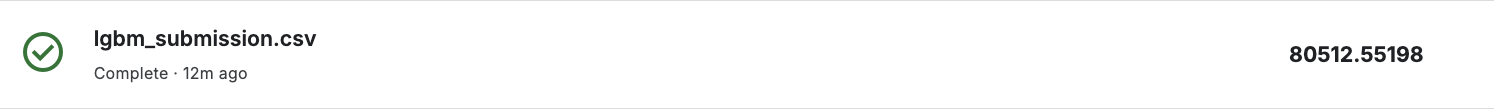

#### GBR 튜닝

In [ ]:
# 모델 튜닝: GBR 모델 튜닝 (약 5분)
gbr_model = tune_model(top3[1])  # 첫 번째 모델 튜닝 (최적 모델을 선택할 수도 있음)

# 튜닝된 모델 확인
gbr_model

'''
GradientBoostingRegressor(max_depth=8, max_features='sqrt',
                          min_impurity_decrease=0.001, min_samples_leaf=5,
                          min_samples_split=10, n_estimators=290,
                          random_state=42, subsample=0.25)
'''

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2981,0.1487,0.3857,0.6324,0.0674,0.0642
1,0.2935,0.1508,0.3883,0.6419,0.0675,0.0631
2,0.3025,0.1572,0.3965,0.6175,0.0681,0.0639
3,0.2864,0.1392,0.3730,0.6596,0.0645,0.0609
4,0.2971,0.1518,0.3896,0.6241,0.0672,0.0629
5,0.2990,0.1536,0.3919,0.6182,0.0671,0.0630
6,0.2928,0.1500,0.3872,0.6284,0.0671,0.0626
7,0.2898,0.1471,0.3835,0.6272,0.0665,0.0621
8,0.2954,0.1512,0.3889,0.6081,0.0666,0.0622


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


"\nGradientBoostingRegressor(max_depth=8, max_features='sqrt',\n                          min_impurity_decrease=0.001, min_samples_leaf=5,\n                          min_samples_split=10, n_estimators=290,\n                          random_state=42, subsample=0.25)\n"

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

X = train.drop(columns=['price'])
y = train['price']

# train과 test의 칼럼 순서 맞추기
X = X[train.columns.drop('price')]
test = test[train.columns.drop('price')]  # train과 동일한 칼럼 순서로 test 데이터 정렬

gbr_model.fit(X, y)
gbr_val_pred = gbr_model.predict(test)
gbr_pred_original = np.expm1(gbr_val_pred)  # 로그 변환된 타겟을 원래 값으로 변환

# 제출
submission['price'] = gbr_pred_original
submission.to_csv('gbr_submission.csv', index=False)

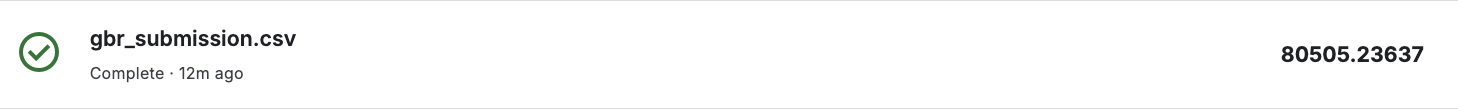

#### XGBoost 튜닝

In [ ]:
# 모델 튜닝: XGBoost 모델 튜닝 (약 5분)
xgb_model = tune_model(top3[2])  # 첫 번째 모델 튜닝 (최적 모델을 선택할 수도 있음)

# 튜닝된 모델 확인
xgb_model

'''
XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device='gpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=130, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)
'''

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2978,0.1486,0.3855,0.6327,0.0673,0.0642
1,0.2971,0.1532,0.3914,0.6362,0.0679,0.0637
2,0.3035,0.1607,0.4008,0.6091,0.0689,0.0640
3,0.2916,0.1453,0.3811,0.6447,0.0659,0.0620
4,0.3009,0.1547,0.3933,0.6168,0.0679,0.0638
5,0.3036,0.1577,0.3971,0.6080,0.0680,0.0640
6,0.2992,0.1533,0.3915,0.6201,0.0680,0.0641
7,0.2961,0.1519,0.3897,0.6150,0.0677,0.0636
8,0.2982,0.1528,0.3909,0.6040,0.0671,0.0628


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


"\nXGBRegressor(base_score=None, booster='gbtree', callbacks=None,\n             colsample_bylevel=None, colsample_bynode=None,\n             colsample_bytree=0.5, device='gpu', early_stopping_rounds=None,\n             enable_categorical=False, eval_metric=None, feature_types=None,\n             gamma=None, grow_policy=None, importance_type=None,\n             interaction_constraints=None, learning_rate=0.05, max_bin=None,\n             max_cat_threshold=None, max_cat_to_onehot=None,\n             max_delta_step=None, max_depth=8, max_leaves=None,\n             min_child_weight=4, missing=nan, monotone_constraints=None,\n             multi_strategy=None, n_estimators=130, n_jobs=-1,\n             num_parallel_tree=None, random_state=42, ...)\n"

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor

X = train.drop(columns='price')
y = train['price']

# train과 test의 칼럼 순서 맞추기
X = X[train.columns.drop('price')]
test = test[train.columns.drop('price')]  # train과 동일한 칼럼 순서로 test 데이터 정렬

In [ ]:
xgb_model.fit(X, y)
xgb_val_pred = xgb_model.predict(test)
xgb_pred_original = np.expm1(xgb_val_pred)  # 로그 변환된 타겟을 원래 값으로 변환

# 제출
submission['price'] = xgb_pred_original
submission.to_csv('xgb_submission.csv', index=False)

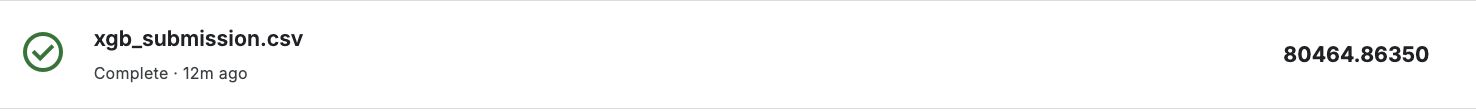

## 블렌딩

In [ ]:
# LightGBM 예측 (로그 변환된 값을 원래 값으로 변환)
lgbm_val_pred = lgbm.predict(test)
lgbm_pred_original = np.expm1(lgbm_val_pred)

# XGBoost 예측 (로그 변환된 값을 원래 값으로 변환)
xgb_val_pred = xgb_model.predict(test)
xgb_pred_original = np.expm1(xgb_val_pred)

# Gradient Boosting 예측 (로그 변환된 값을 원래 값으로 변환)
gbr_val_pred = gbr_model.predict(test)
gbr_pred_original = np.expm1(gbr_val_pred)

# 단순 평균 블렌딩
blended_pred = (xgb_pred_original + gbr_pred_original + lgbm_pred_original) / 3

# 가중 평균 블렌딩 (가중치를 조정 가능)
# 예: LightGBM 40%, XGBoost 30%, Gradient Boosting 30%,
blended_pred_weighted = (0.3 * xgb_pred_original) + (0.3 * gbr_pred_original) + (0.4 * lgbm_pred_original)

# 제출 (단순 평균 사용)
submission['price'] = blended_pred
submission.to_csv('blended_submission.csv', index=False)

# 제출 (가중 평균 사용)
submission['price'] = blended_pred_weighted
submission.to_csv('blended_weighted_submission.csv', index=False)

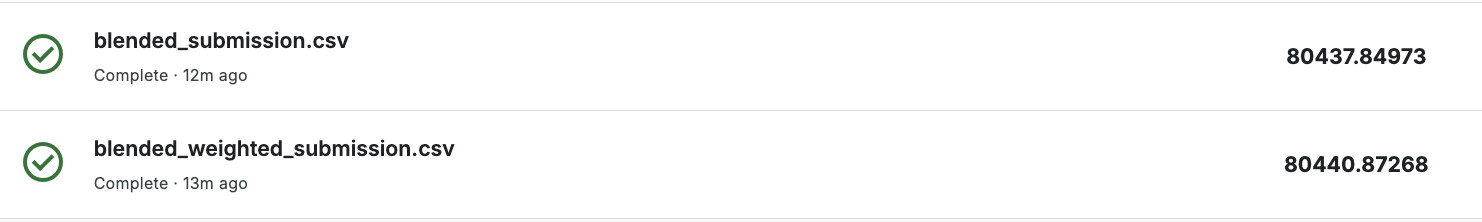

## 최종 리더보드 제출

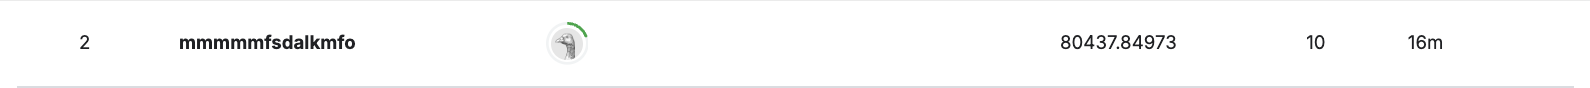